In [1]:
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
#음수표시
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
matplotlib.rc("axes", unicode_minus = False)
plt.rcParams["font.family"] = 'NanumGothic'

-  함수

In [3]:
def show_EDA_bj(set_data):
    for i in set_data.columns:
        print(i)
        sns.countplot(x = i, hue = 'ChurnLabel', data = set_data)
        sns.set(font_scale = 1.5)
        plt.show()

def show_EDA_cont(set_data):
    for i in set_data.columns:
        print(i)
        sns.histplot(x = i, hue = 'ChurnLabel', data = set_data)
        plt.rc('font', size = 20)
        plt.show()

In [4]:
def show_EDA_indi(set_data, var):
    sns.countplot(x = var, order = range(1,6), data = set_data)
    sns.set(font_scale = 1.5)
    plt.show()

In [5]:
#일반 EDA
def show_EDA_gn_bj(set_data):
    for i in set_data.columns:
        print(i)
        sns.countplot(x = i, data = set_data)
        sns.set(font_scale = 1.5)
        plt.show()
        
def show_EDA_gn_cont(set_data):
    for i in set_data.columns:
        print(i)
        sns.histplot(x = i, data = set_data)
        plt.rc('font', size = 20)
        plt.show()

In [6]:
# 평균보다 24%이상 과금러
def high_avg_of_monthly_charge(data):
    sum = 0
    for i in range(len(data)):
        sum += data['Monthly_charge'][i]
    avg = sum / len(data)
    high_avg = (avg * 1.24).round(0)
    return high_avg

In [7]:
df_raw = pd.read_csv('tele_customer_final.csv')
df_raw = df_raw.drop(labels = 'Unnamed: 0',axis = 1)

In [8]:
df_raw.head()

CustomerId Gender  Age AgeGroup Married Dependents  noDependents Referrals  \
0    C-10001     여성   37      30대     Yes         No             0       Yes   
1    C-10002     남성   46      40대      No         No             0        No   
2    C-10003     남성   50      50대      No         No             0        No   
3    C-10004     남성   78      70대     Yes         No             0       Yes   
4    C-10005     여성   75      70대     Yes         No             0       Yes   

   noReferrals PaperlessBilling  ...              ChurnReason CustomerLTV  \
0            2              Yes  ...                      NaN        2205   
1            0               No  ...                      NaN        5414   
2            0              Yes  ...           Price too high        4479   
3            1              Yes  ...  Product dissatisfaction        3714   
4            3              Yes  ...      Network reliability        3464   

  SatisScore TotalExtraDataCharge AvgRoamCharge  TotalRoamCharge Tenure_month  \
0          3                    0         47910           431100           21   
1          5                11300         12090           108710           21   
2          1                    0         38080           152100            5   
3          1                    0         31410           408720           14   
4          1                    0          8360            24970            4   

  Sum_charge Monthly_charge ReasonCategory  
0    1755400   83590.476190            NaN  
1    1447500   68928.571429            NaN  
2     490900   98180.000000          Price  
3    1578400  112742.857143             PS  
4     378000   94500.000000             PS  

[5 rows x 32 columns]

In [11]:
df_churn_n = df_raw[(df_raw['ChurnLabel'] == 'No')]

In [12]:
df_raw_use = df_raw.drop(['CustomerId', 'StartDate', 'EndDate', 'EndDateTmp', \
                          'ChurnCategory', 'ChurnReason'], axis = 1, inplace = False)

In [13]:
df_raw_use_churn = df_raw.drop(['CustomerId', 'StartDate', 'EndDate', 'EndDateTmp',\
                                'ChurnReason'], axis = 1, inplace = False)

# 전체집단

In [12]:
df_raw_use

Gender  Age AgeGroup Married Dependents  noDependents Referrals  \
0        여성   37      30대     Yes         No             0       Yes   
1        남성   46      40대      No         No             0        No   
2        남성   50      50대      No         No             0        No   
3        남성   78      70대     Yes         No             0       Yes   
4        여성   75      70대     Yes         No             0       Yes   
...     ...  ...      ...     ...        ...           ...       ...   
6854     여성   20      20대      No         No             0        No   
6855     남성   40      40대     Yes         No             0       Yes   
6856     남성   22      20대      No         No             0        No   
6857     남성   21      20대      No         No             0       Yes   
6858     남성   36      30대     Yes         No             0       Yes   

      noReferrals PaperlessBilling PaymentMethod  ... ChurnScore CustomerLTV  \
0               2              Yes          신용카드  ...         65        2205   
1               0               No          신용카드  ...         66        5414   
2               0              Yes          계좌이체  ...         71        4479   
3               1              Yes          계좌이체  ...         99        3714   
4               3              Yes          신용카드  ...         68        3464   
...           ...              ...           ...  ...        ...         ...   
6854            0               No          신용카드  ...         59        3161   
6855            1              Yes          계좌이체  ...         68        5248   
6856            0              Yes          신용카드  ...         33        5870   
6857            5               No          신용카드  ...         59        4792   
6858            1               No          계좌이체  ...         20        5639   

     SatisScore TotalExtraDataCharge  AvgRoamCharge TotalRoamCharge  \
0             3                    0          47910          431100   
1             5                11300          12090          108710   
2             1                    0          38080          152100   
3             1                    0          31410          408720   
4             1                    0           8360           24970   
...         ...                  ...            ...             ...   
6854          4                    0          52770          685680   
6855          1                    0          18310          402730   
6856          5                    0          21020           42040   
6857          3                    0           2370          160460   
6858          3                    0              0               0   

      Tenure_month  Sum_charge  Monthly_charge  ReasonCategory  
0               21     1755400    83590.476190             NaN  
1               21     1447500    68928.571429             NaN  
2                5      490900    98180.000000           Price  
3               14     1578400   112742.857143              PS  
4                4      378000    94500.000000              PS  
...            ...         ...             ...             ...  
6854            25     1610700    64428.000000             NaN  
6855            23     2343500   101891.304348              PS  
6856            14      792400    56600.000000             NaN  
6857            79     6328500    80107.594937             NaN  
6858            75     5196100    69281.333333             NaN  

[6859 rows x 26 columns]

In [13]:
df_raw_char = df_raw_use.select_dtypes(include = 'object') #범주형
df_raw_use['ChurnLabel'] = df_raw_use['ChurnLabel'].replace({'Yes': 1, 'No': 0})

In [14]:
df_raw_numeric = df_raw_use.select_dtypes(exclude = 'object') #연속형

## 범주형

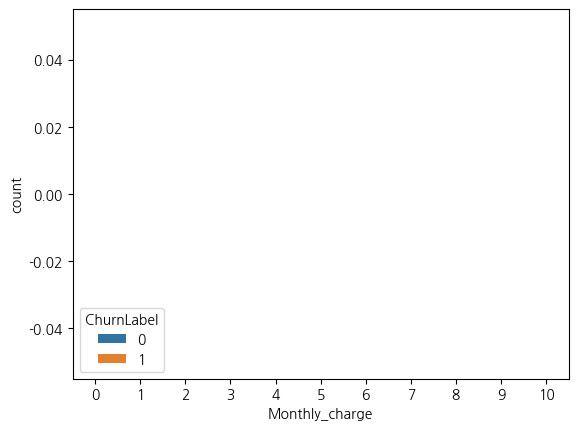

In [15]:
sns.countplot(x = 'Monthly_charge', order = range(0,11), hue = 'ChurnLabel', data = df_raw_use)
sns.set(font_scale = 1.5)
plt.show()

Gender


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


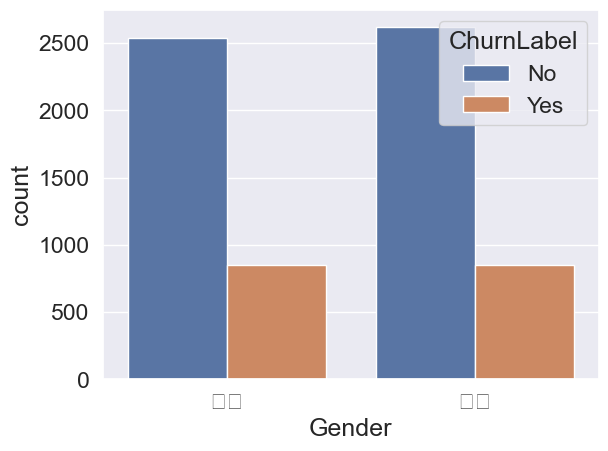

AgeGroup


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


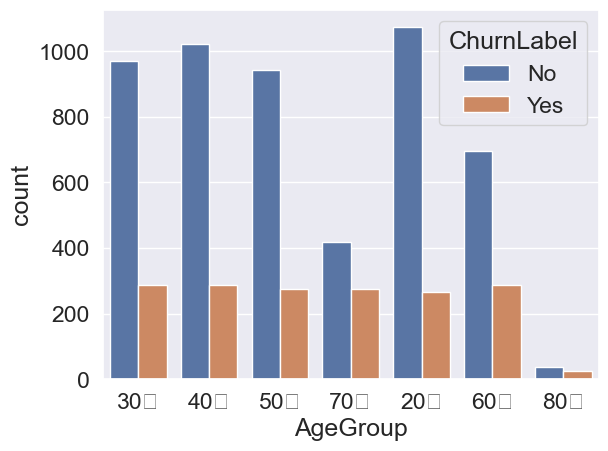

Married


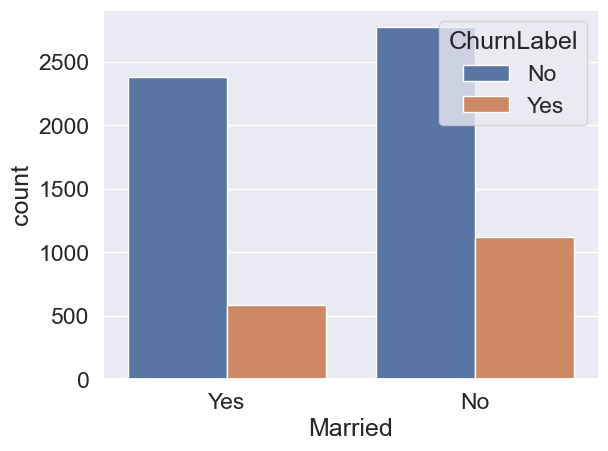

Dependents


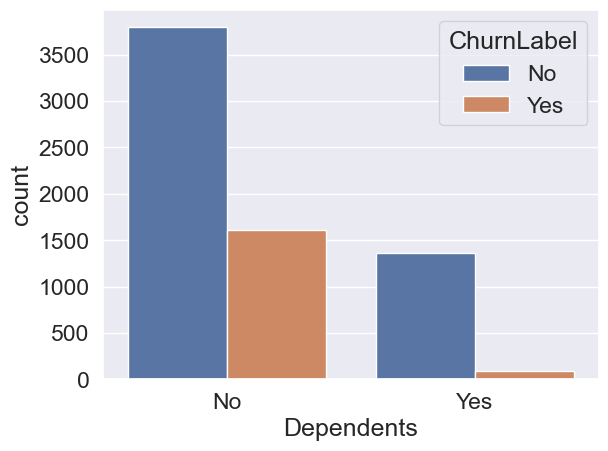

Referrals


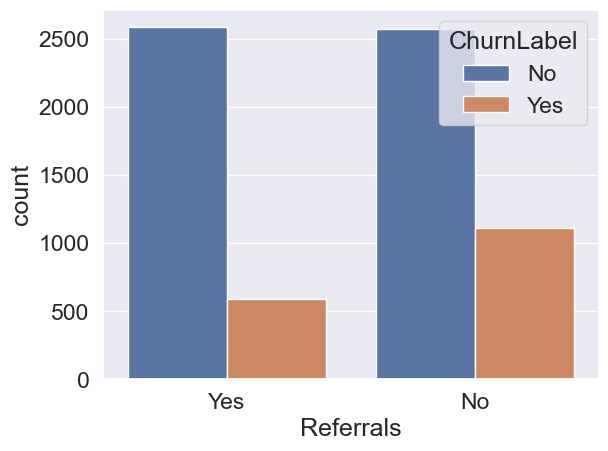

PaperlessBilling


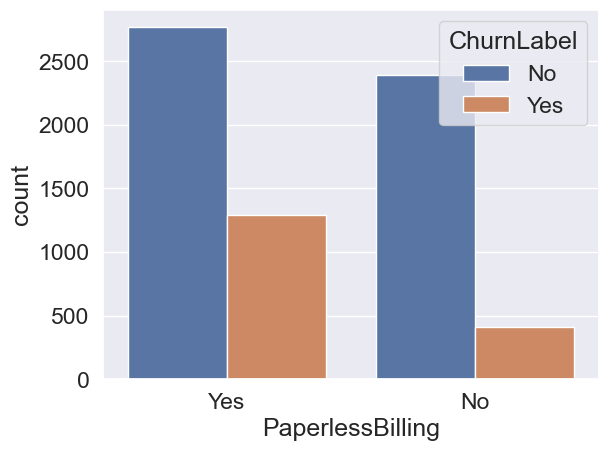

PaymentMethod


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  

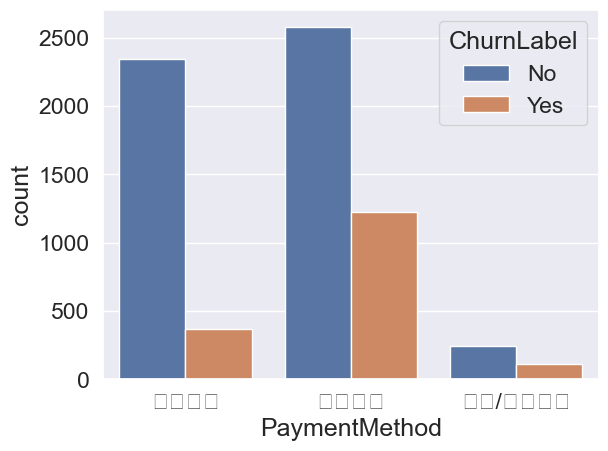

OnlineSecurity


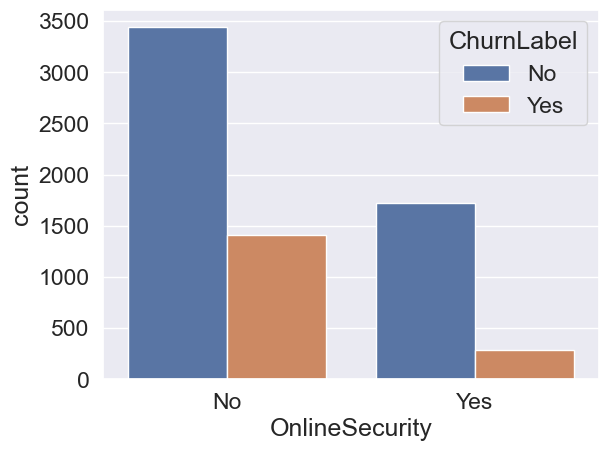

OnlineBackup


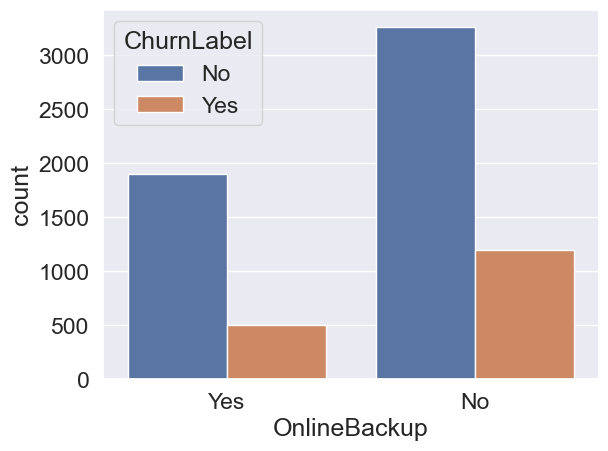

TechSupport


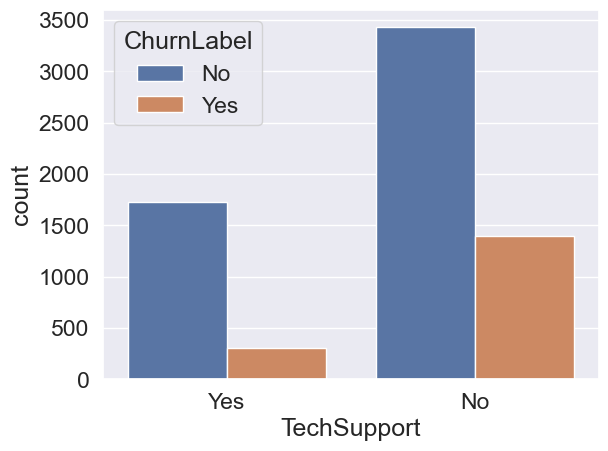

UnlimitedData


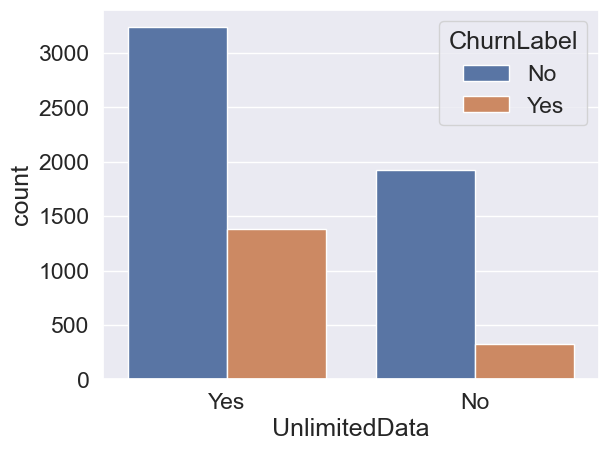

ChurnLabel


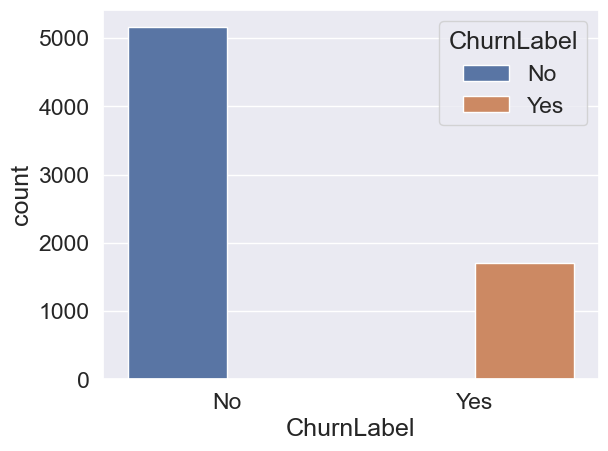

ReasonCategory


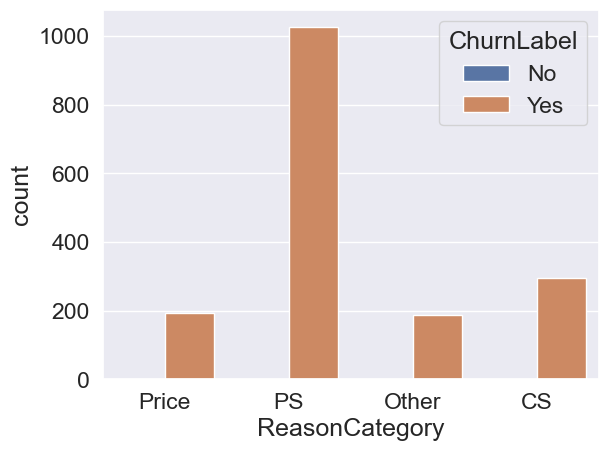

In [16]:
show_EDA_bj(df_raw_char)

## 연속형

Age


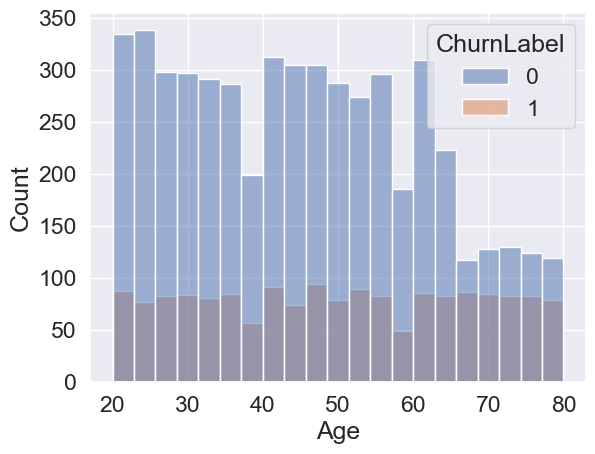

noDependents


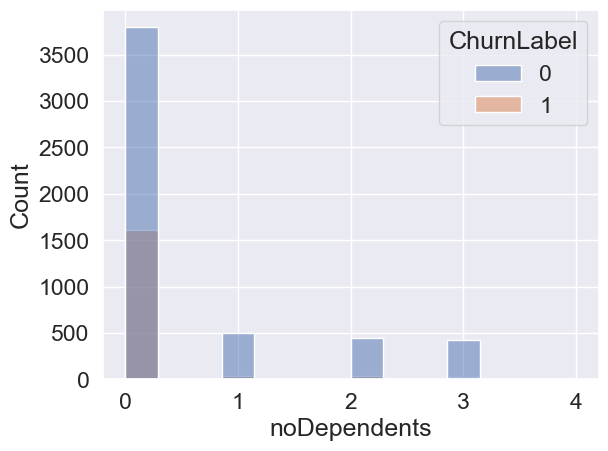

noReferrals


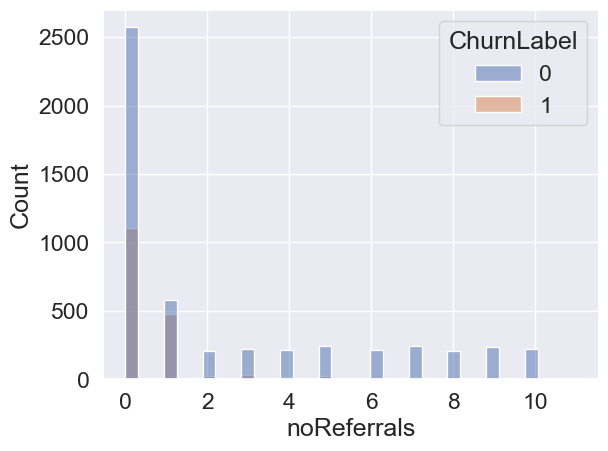

AvgDownloadGB


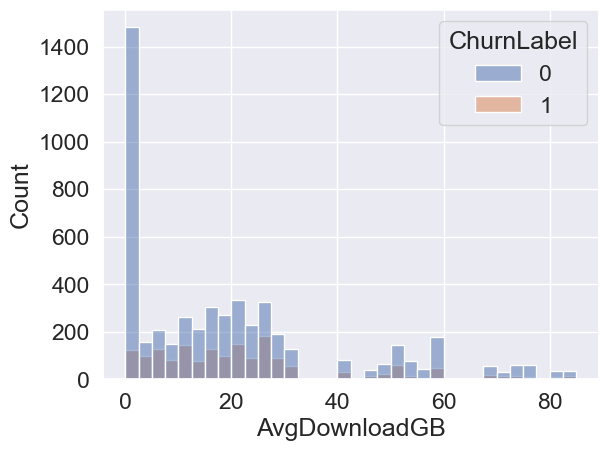

ChurnLabel


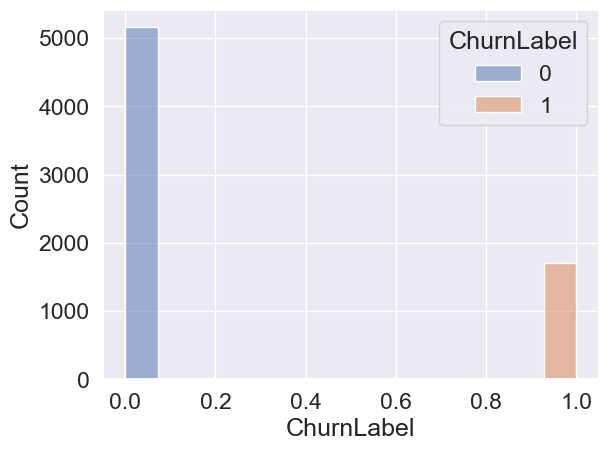

ChurnScore


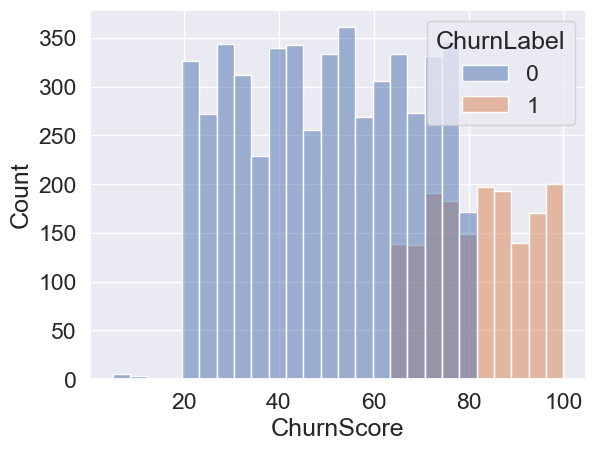

CustomerLTV


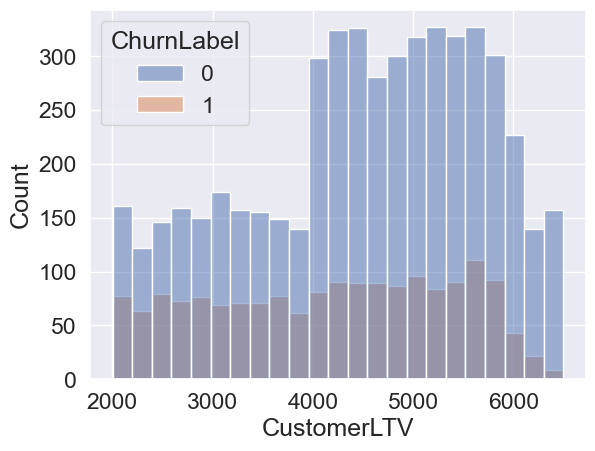

SatisScore


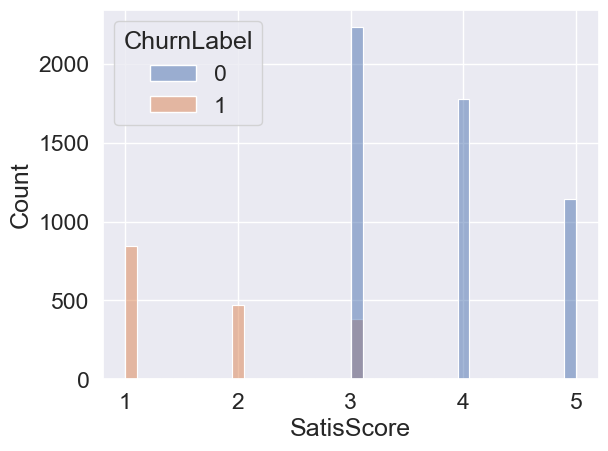

TotalExtraDataCharge


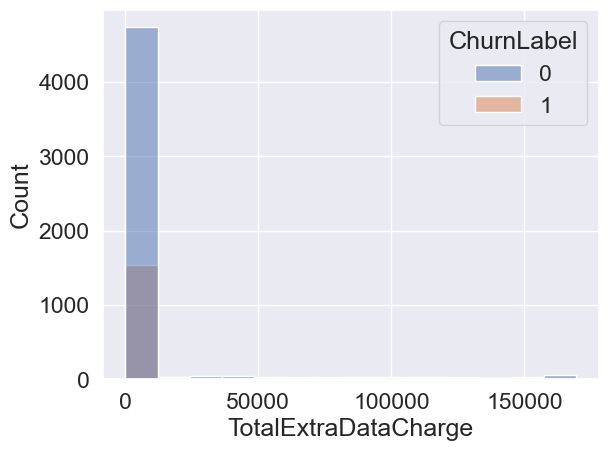

AvgRoamCharge


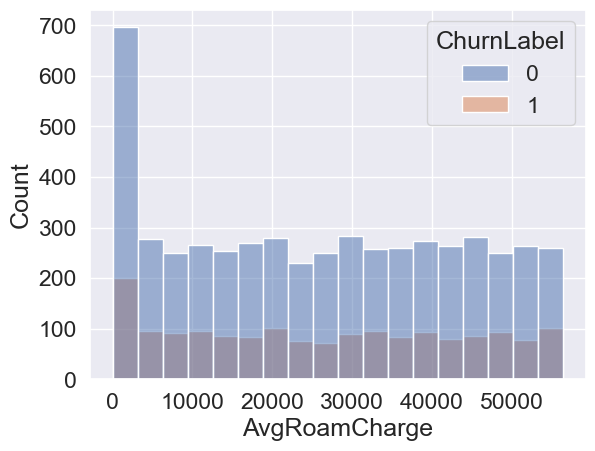

TotalRoamCharge


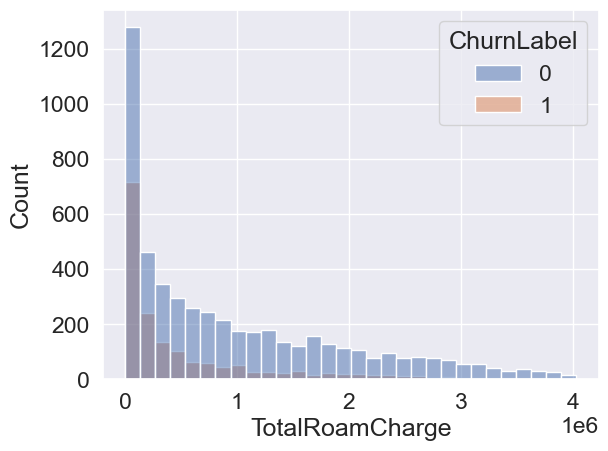

Tenure_month


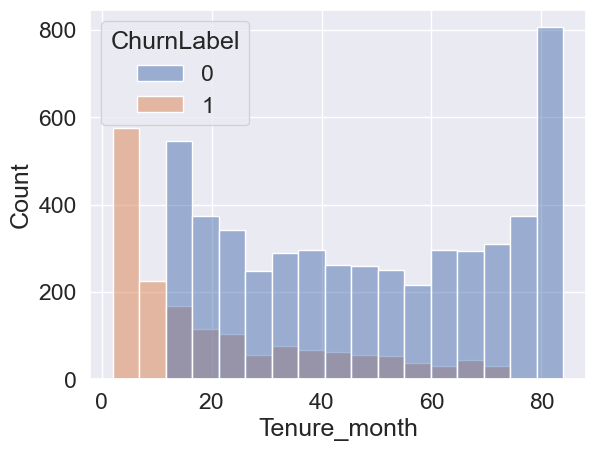

Sum_charge


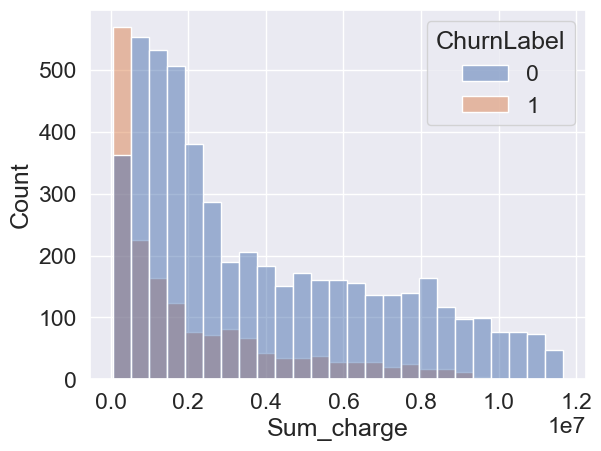

Monthly_charge


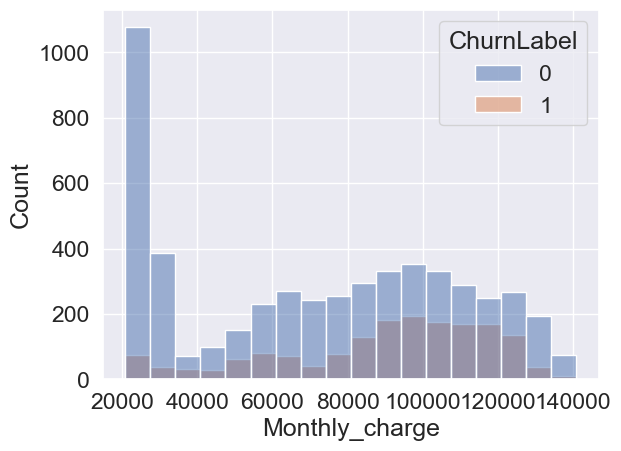

In [17]:
show_EDA_cont(df_raw_numeric)

### 개인별

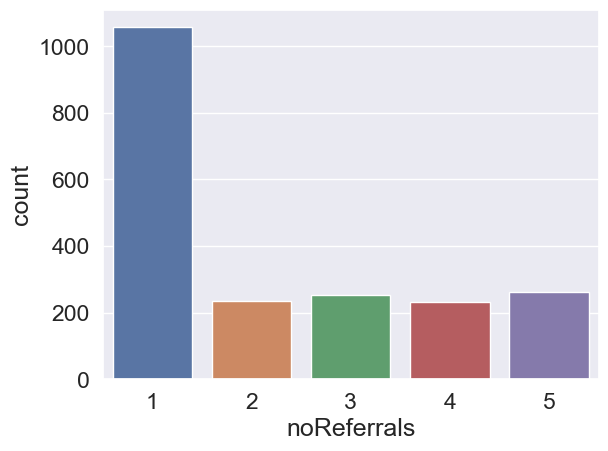

In [18]:
show_EDA_indi(df_raw_numeric, 'noReferrals')


In [19]:
df_raw_use = df_raw.drop(['CustomerId', 'StartDate', 'EndDate', 'EndDateTmp', \
                          'ChurnCategory', 'ChurnReason', 'ReasonCategory'], axis = 1, inplace = False)

# Churn No & Churnscore >= 65

In [20]:
#churnscore >= 65 & churnLabel = No
df_churnscore_n = df_raw_use[((df_raw['ChurnScore'] >= 65) & (df_raw['ChurnScore'] <= 85))]

In [21]:
df_churn_n_char = df_churnscore_n.select_dtypes(include = 'object') #범주형

In [22]:
df_churnscore_n['ChurnLabel'] = df_churnscore_n['ChurnLabel'].replace({'Yes': 1, 'No': 0})
df_churn_n_numeric = df_churnscore_n.select_dtypes(exclude = 'object') #연속형

C:\Users\Kwangyoung Han\AppData\Local\Temp\ipykernel_22140\260925537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churnscore_n['ChurnLabel'] = df_churnscore_n['ChurnLabel'].replace({'Yes': 1, 'No': 0})


## 범주형

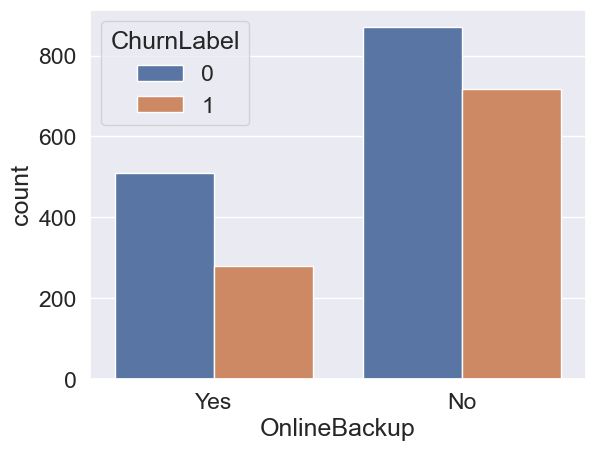

In [23]:
sns.countplot(x = 'OnlineBackup', order = ['Yes', 'No'], hue = 'ChurnLabel', data = df_churnscore_n)
sns.set(font_scale = 1.5)
plt.show()

Gender


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


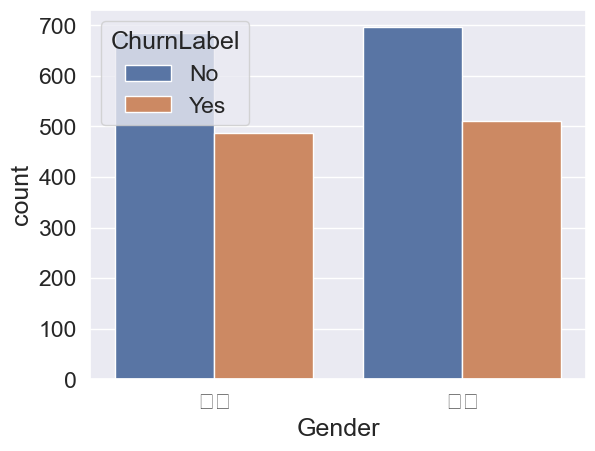

C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


AgeGroup


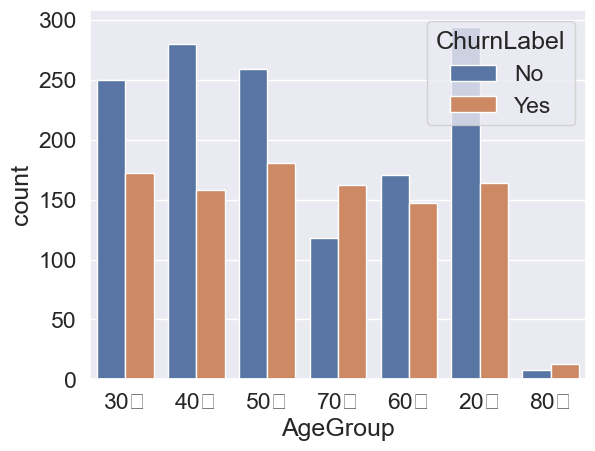

Married


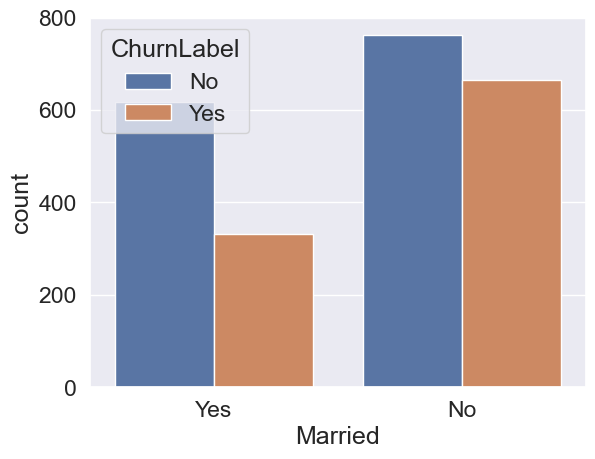

Dependents


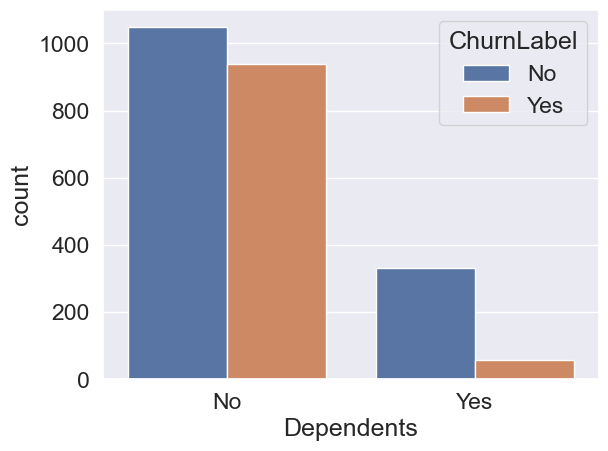

Referrals


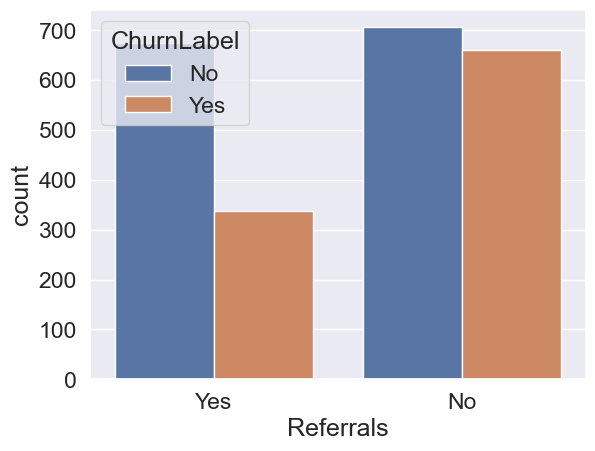

PaperlessBilling


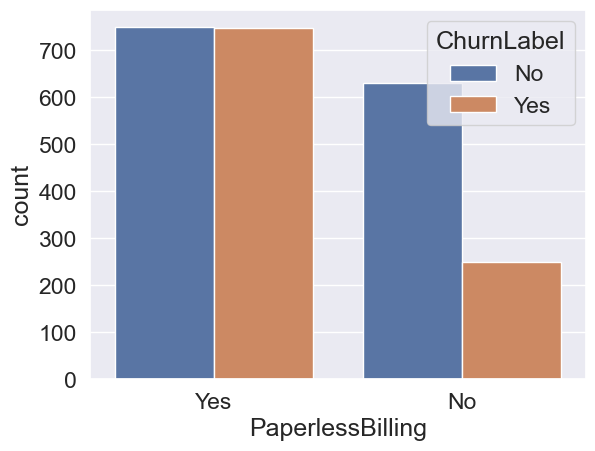

PaymentMethod


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  

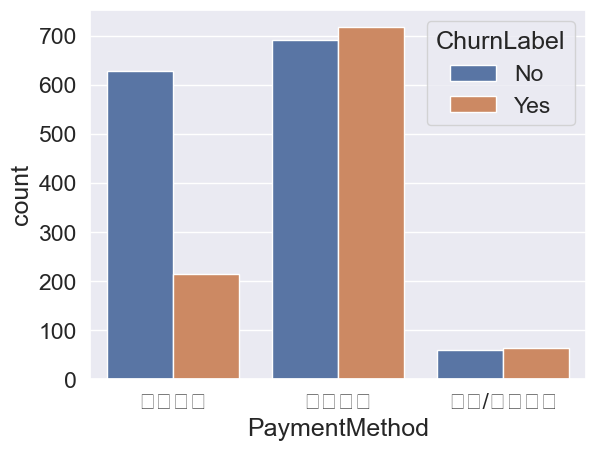

OnlineSecurity


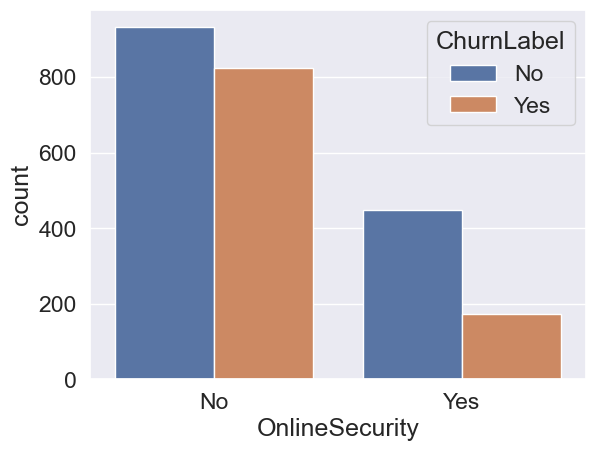

OnlineBackup


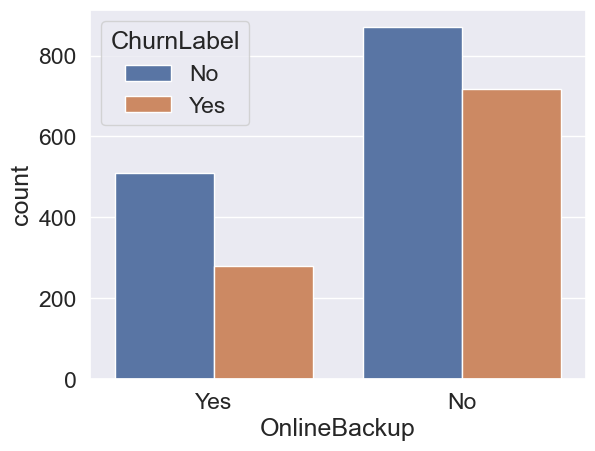

TechSupport


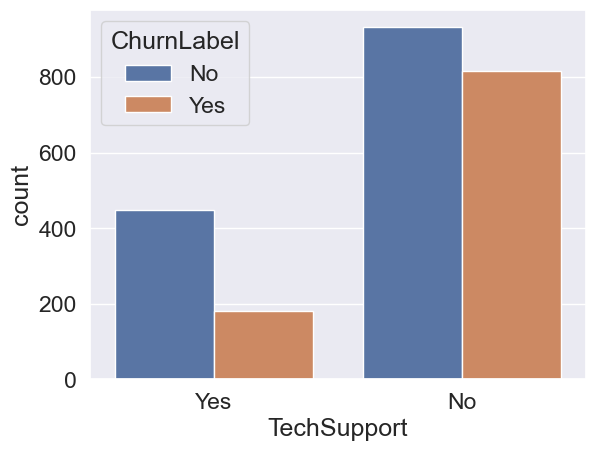

UnlimitedData


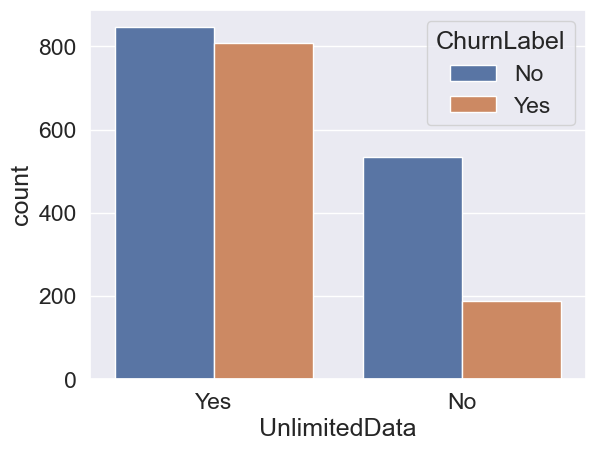

ChurnLabel


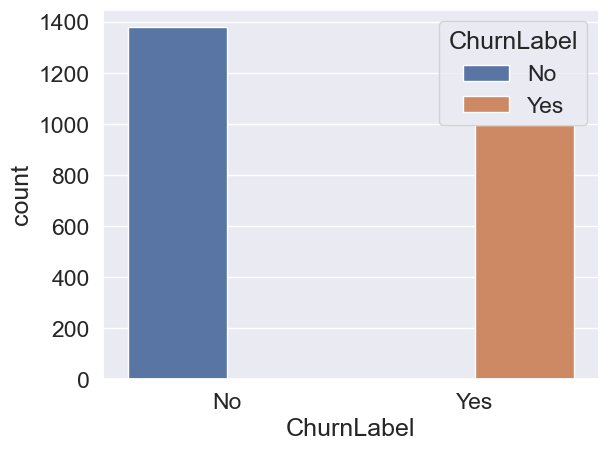

In [24]:
show_EDA_bj(df_churn_n_char)

## 연속형

In [25]:
df_churn_n_numeric

Age  noDependents  noReferrals  AvgDownloadGB  ChurnLabel  ChurnScore  \
0      37             0            2             16           0          65   
1      46             0            0             10           0          66   
2      50             0            0             30           1          71   
4      75             0            3             11           1          68   
19     67             0            0              9           1          85   
...   ...           ...          ...            ...         ...         ...   
6846   77             0            1             25           0          73   
6849   24             0            0              0           0          69   
6850   72             1            1             22           0          68   
6853   36             0            0              0           1          85   
6855   40             0            1             17           1          68   

      CustomerLTV  SatisScore  TotalExtraDataCharge  AvgRoamCharge  \
0            2205           3                     0          47910   
1            5414           5                 11300          12090   
2            4479           1                     0          38080   
4            3464           1                     0           8360   
19           5437           3                     0              0   
...           ...         ...                   ...            ...   
6846         6355           3                     0          53790   
6849         4480           4                     0          55940   
6850         3384           3                 90400          47800   
6853         5822           1                     0           2260   
6855         5248           1                     0          18310   

      TotalRoamCharge  Tenure_month  Sum_charge  Monthly_charge  
0              431100            21     1755400    83590.476190  
1              108710            21     1447500    68928.571429  
2              152100             5      490900    98180.000000  
4               24970             4      378000    94500.000000  
19                  0             2       55600    27800.000000  
...               ...           ...         ...             ...  
6846          2853140            65     7092600   109116.923077  
6849            55940            13      298100    22930.769231  
6850          2245990            59     5890100    99832.203390  
6853             9040             5      118300    23660.000000  
6855           402730            23     2343500   101891.304348  

[2377 rows x 14 columns]

Age


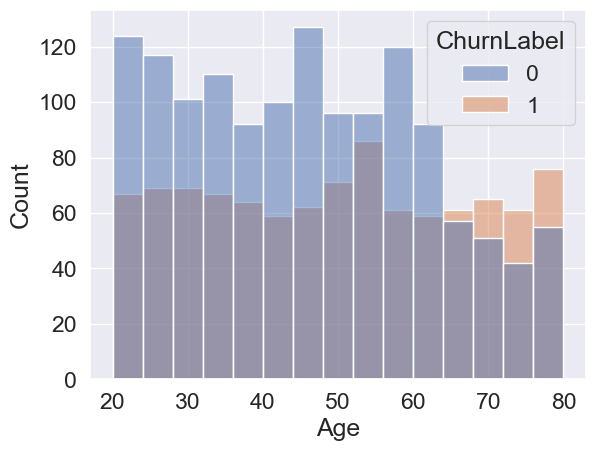

noDependents


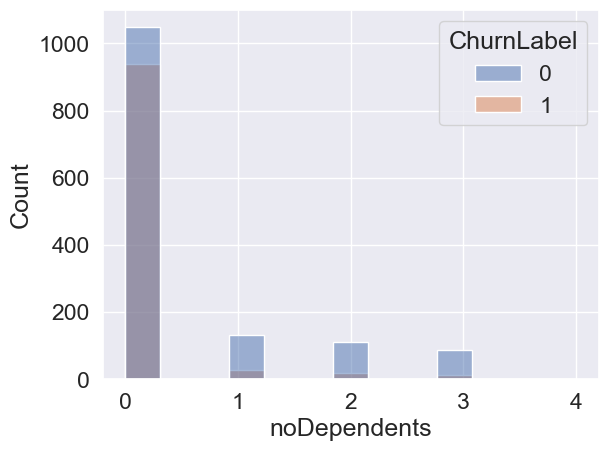

noReferrals


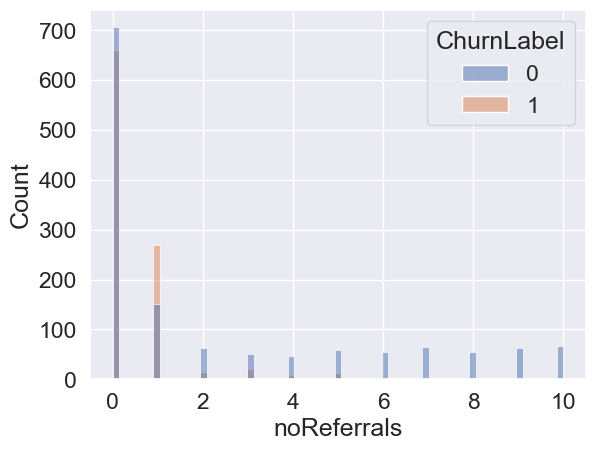

AvgDownloadGB


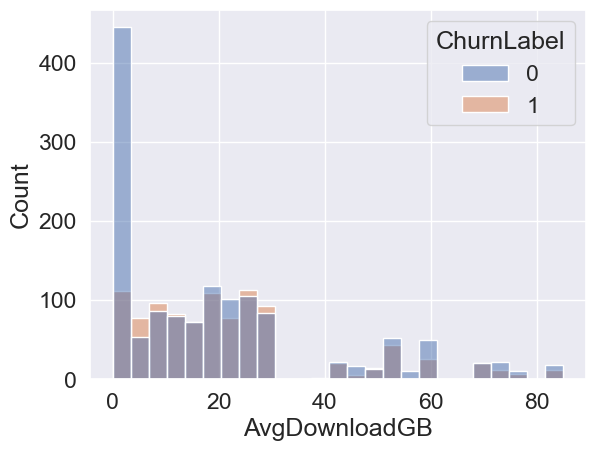

ChurnLabel


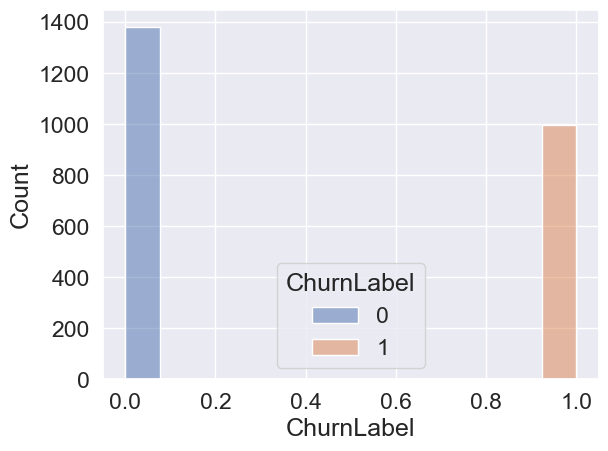

ChurnScore


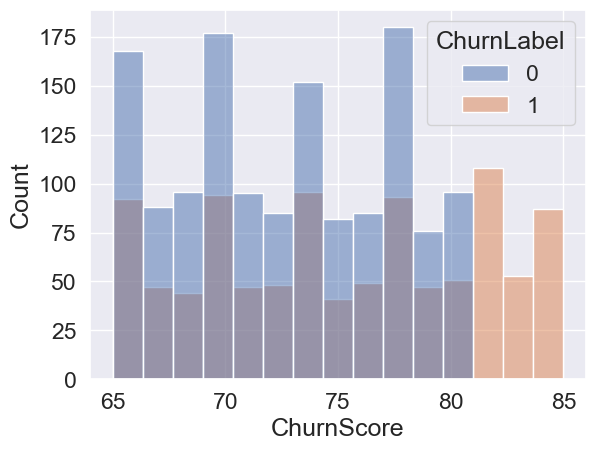

CustomerLTV


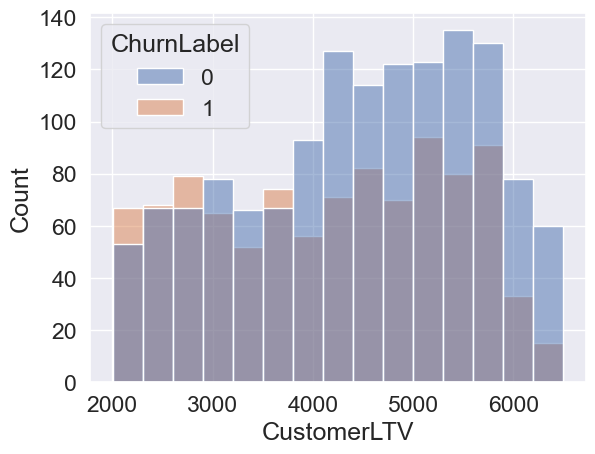

SatisScore


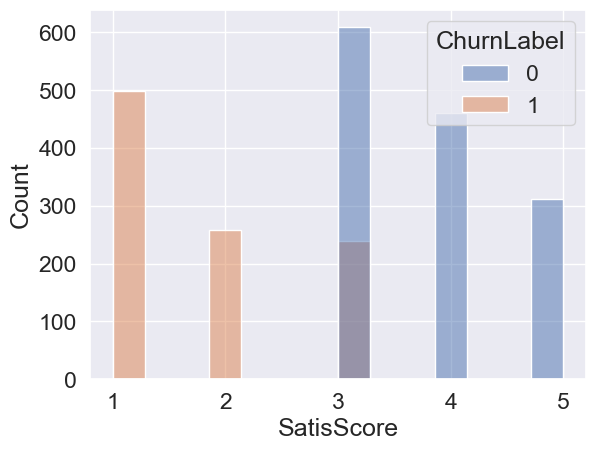

TotalExtraDataCharge


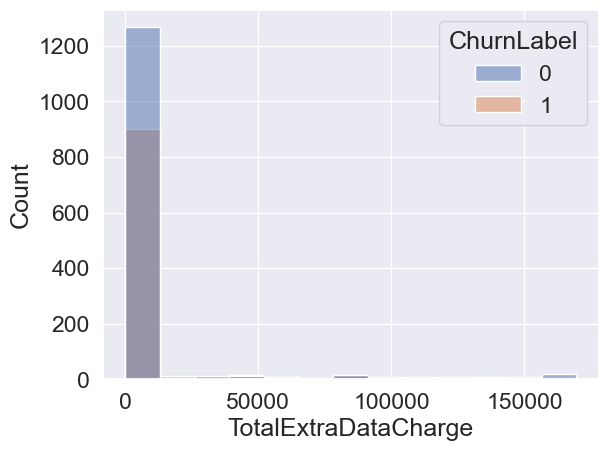

AvgRoamCharge


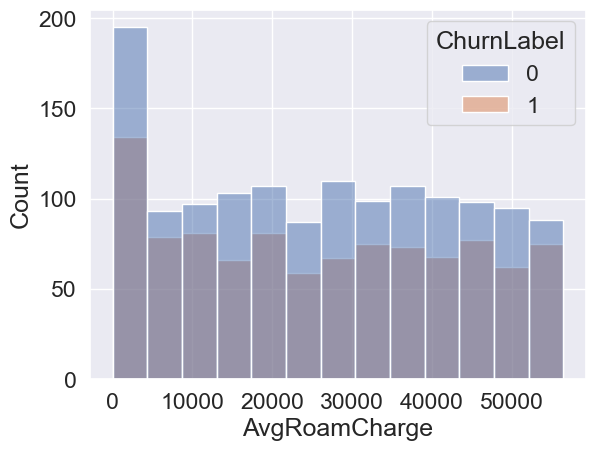

TotalRoamCharge


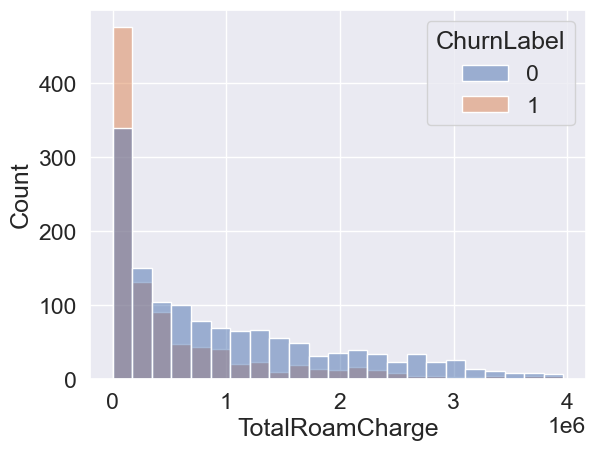

Tenure_month


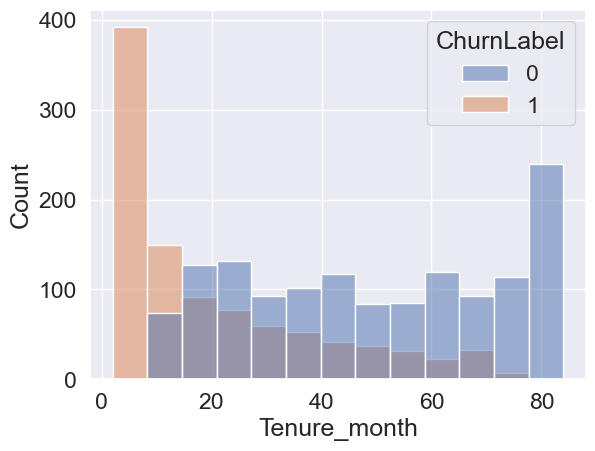

Sum_charge


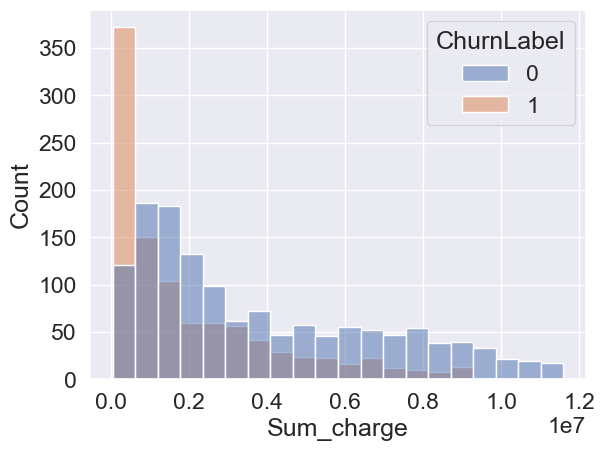

Monthly_charge


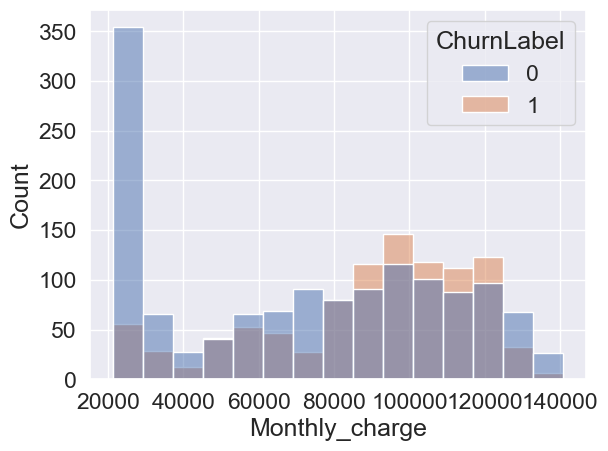

In [26]:
show_EDA_cont(df_churn_n_numeric)

# Churn No & LTV >= 5338

In [27]:
#LTV >= 65 & churnLabel =  No
df_LTV_n = df_raw_use[(df_raw_use['CustomerLTV'] >= 5388)]

In [28]:
df_LTV_n_char = df_LTV_n.select_dtypes(include = 'object') #범주형
df_LTV_n['ChurnLabel'] = df_LTV_n['ChurnLabel'].replace({'Yes': 1, 'No': 0})
df_LTV_n_numeric = df_LTV_n.select_dtypes(exclude = 'object') #연속형

C:\Users\Kwangyoung Han\AppData\Local\Temp\ipykernel_22140\4284833448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LTV_n['ChurnLabel'] = df_LTV_n['ChurnLabel'].replace({'Yes': 1, 'No': 0})


## 범주형

Gender


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


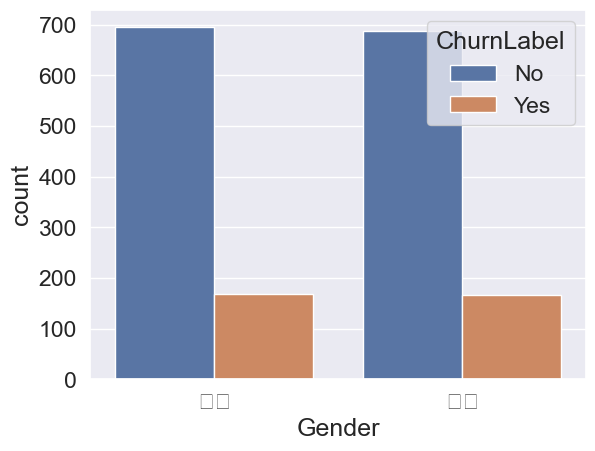

AgeGroup


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


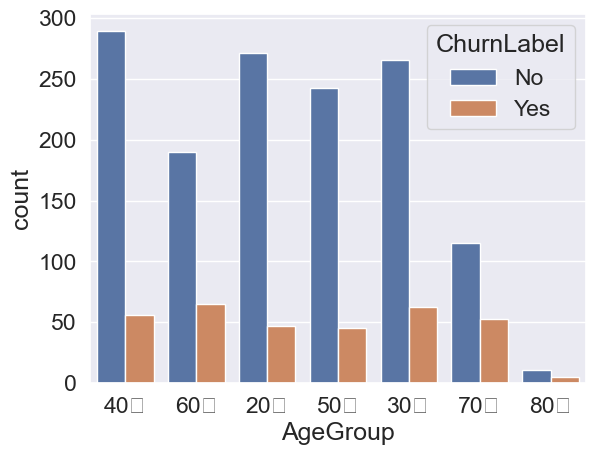

Married


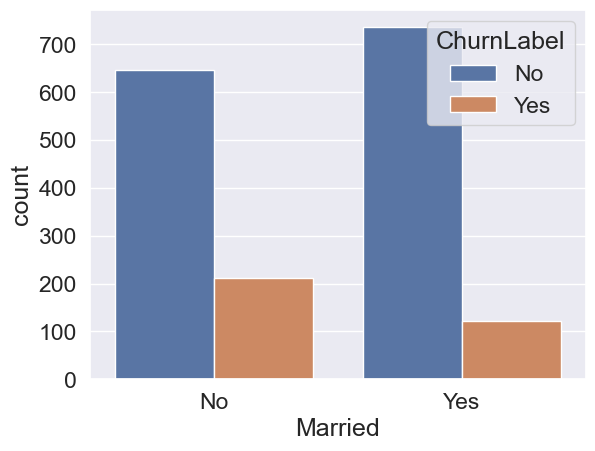

Dependents


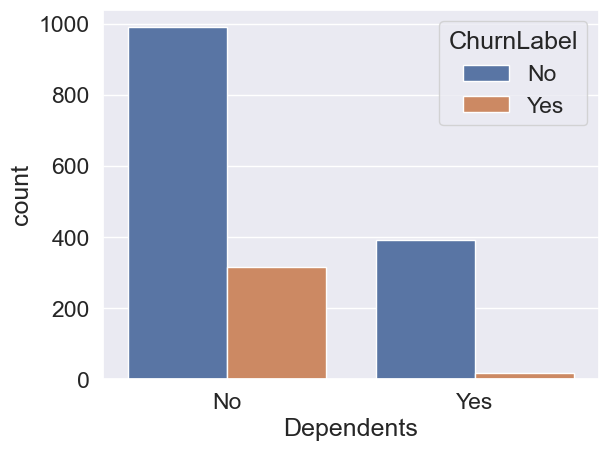

Referrals


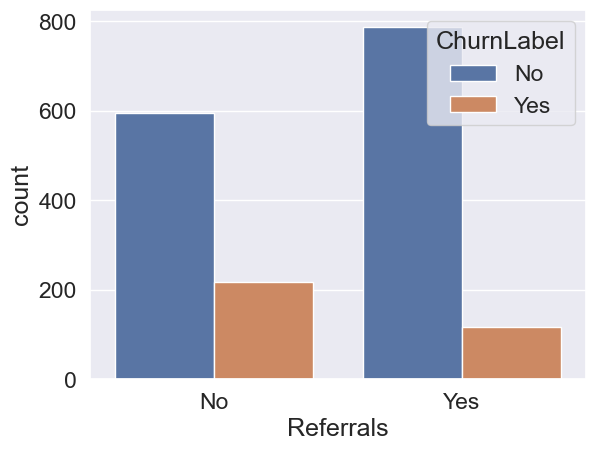

PaperlessBilling


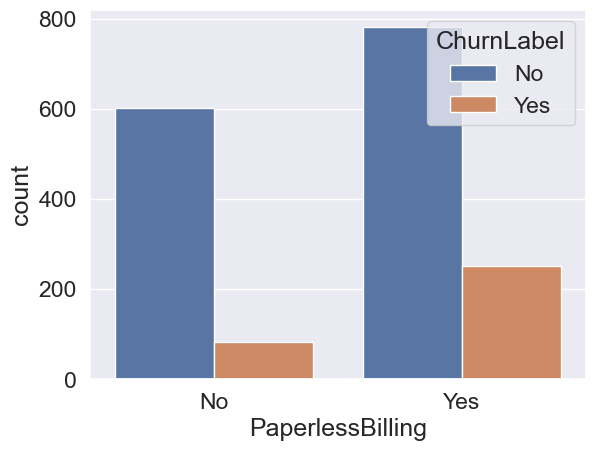

PaymentMethod


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  

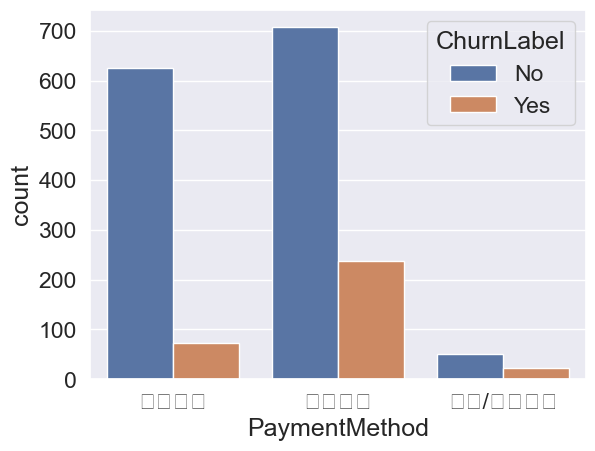

OnlineSecurity


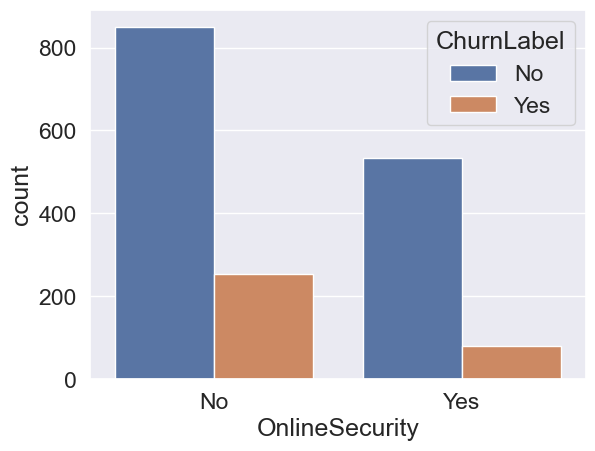

OnlineBackup


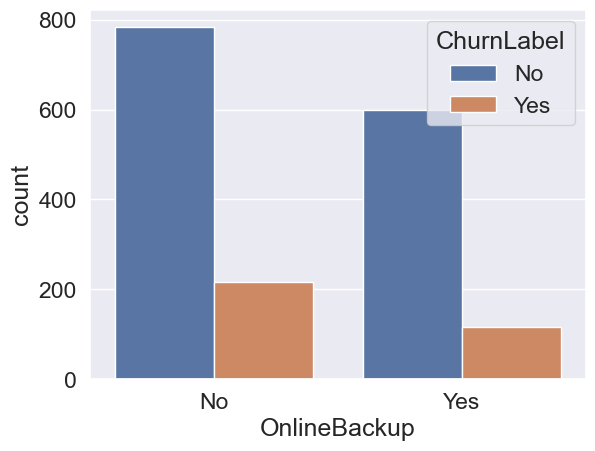

TechSupport


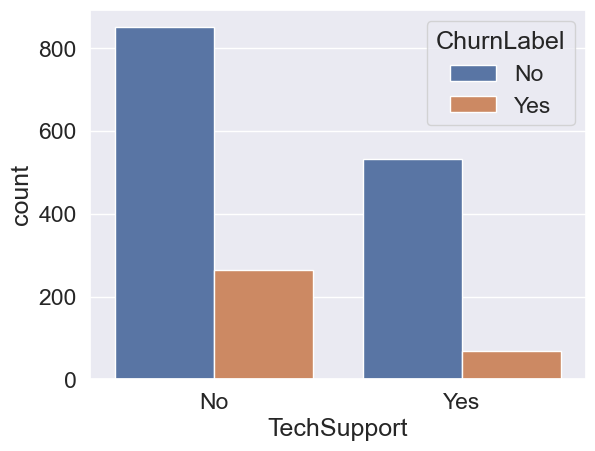

UnlimitedData


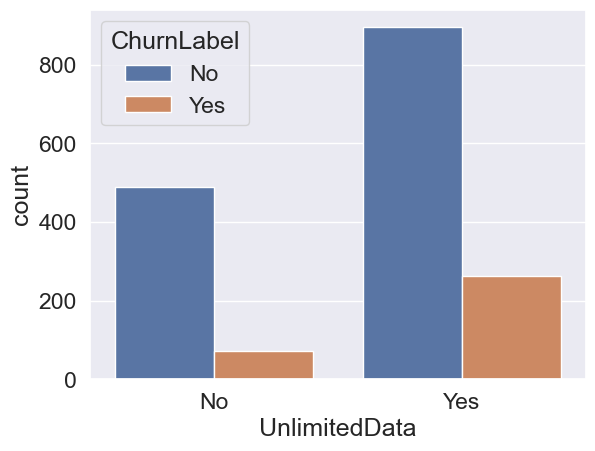

ChurnLabel


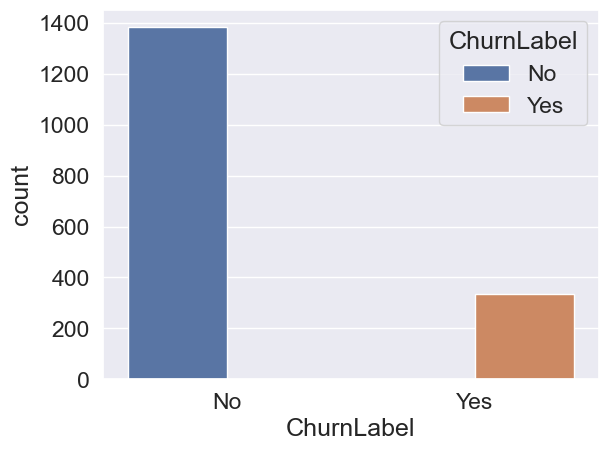

In [29]:
show_EDA_bj(df_LTV_n_char)

## 연속형

Age


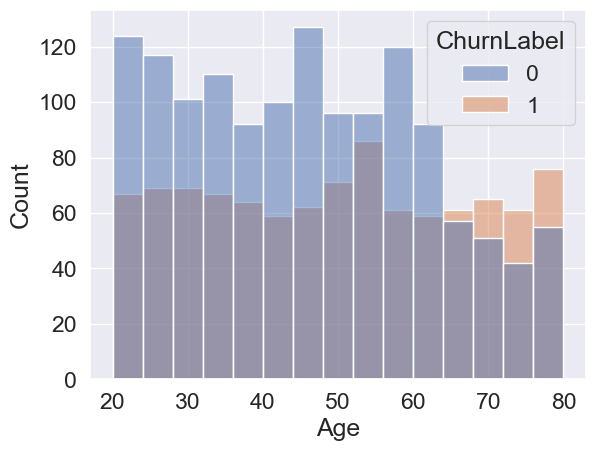

noDependents


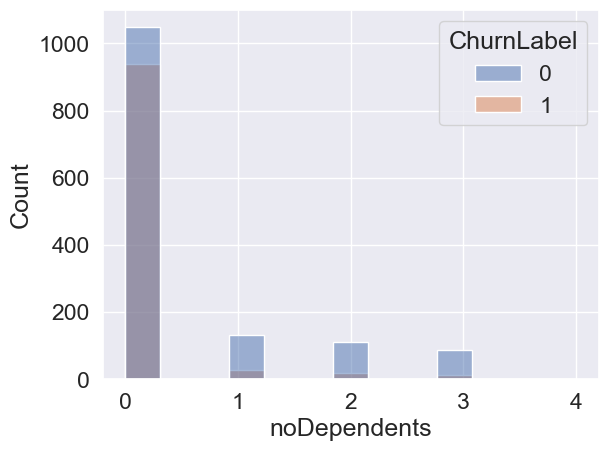

noReferrals


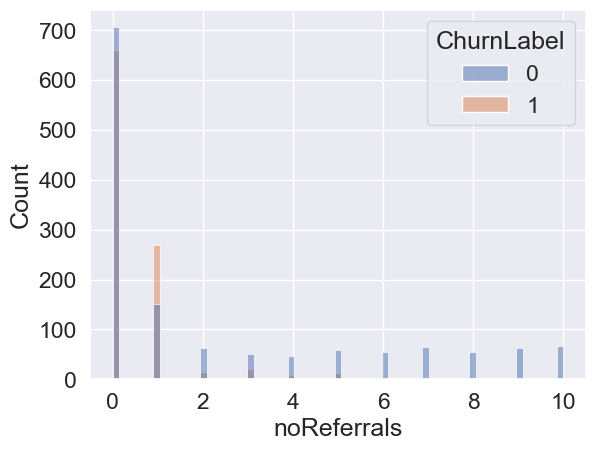

AvgDownloadGB


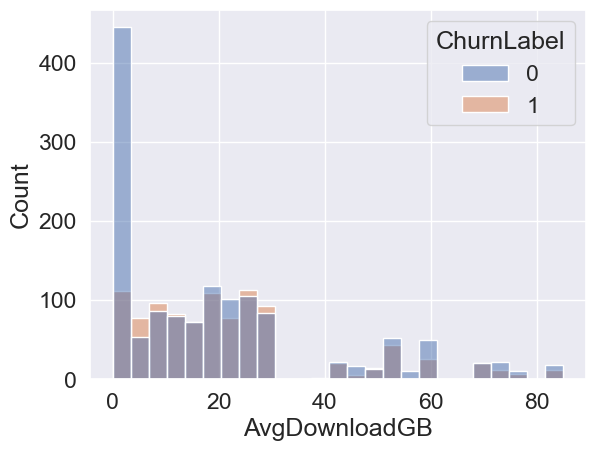

ChurnLabel


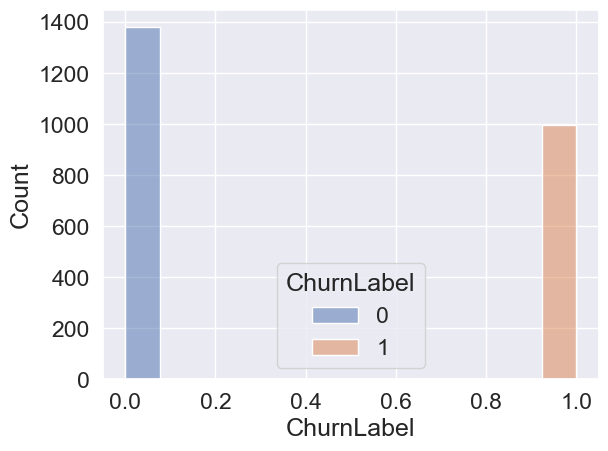

ChurnScore


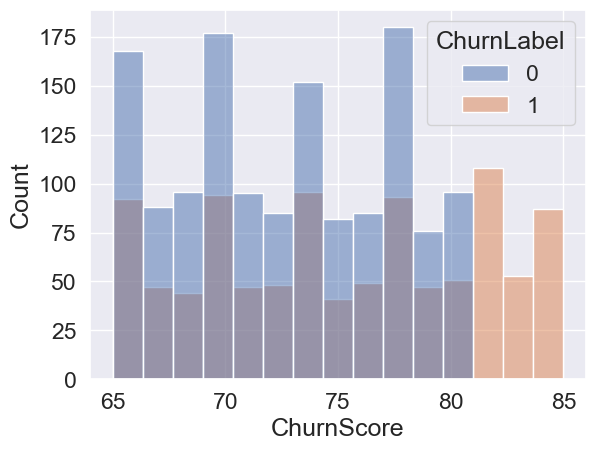

CustomerLTV


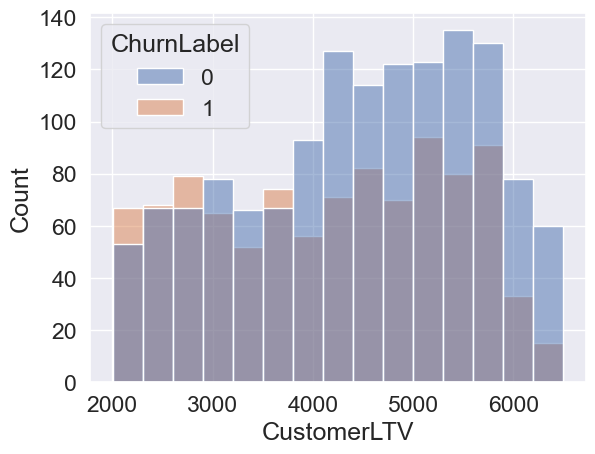

SatisScore


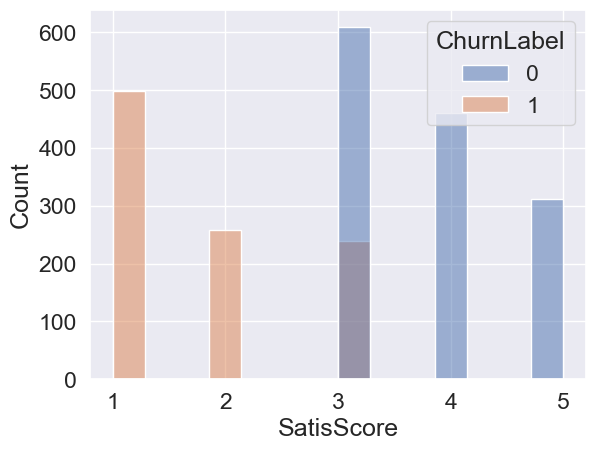

TotalExtraDataCharge


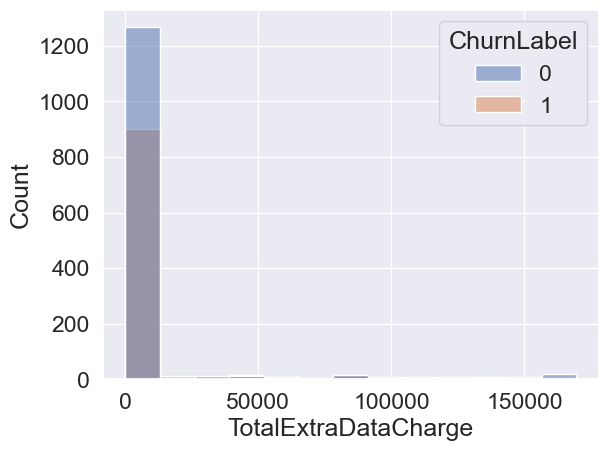

AvgRoamCharge


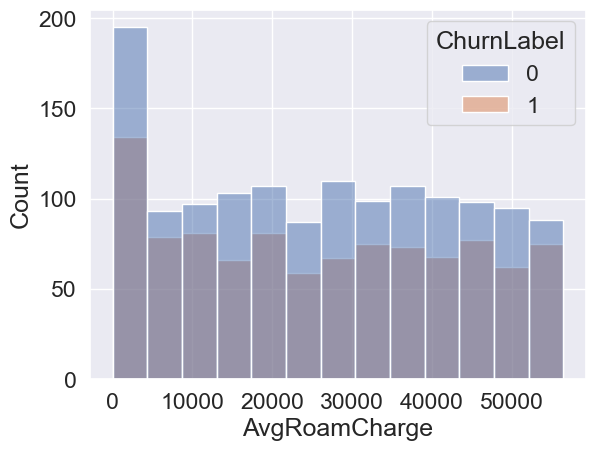

TotalRoamCharge


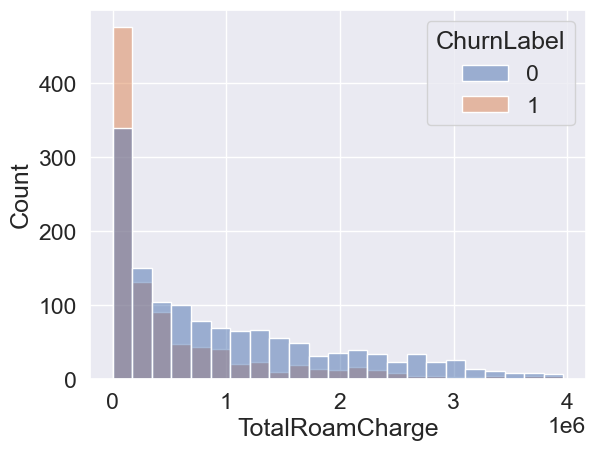

Tenure_month


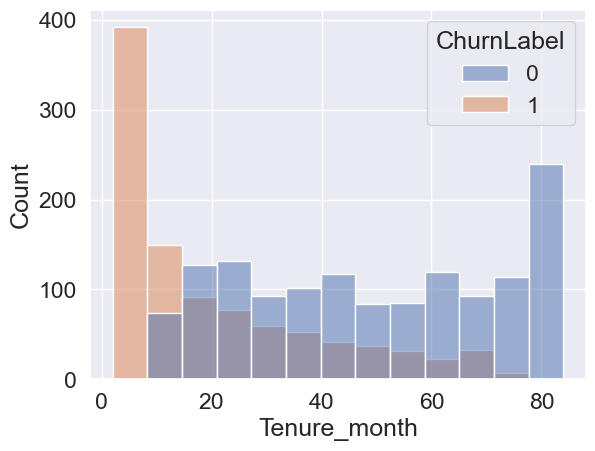

Sum_charge


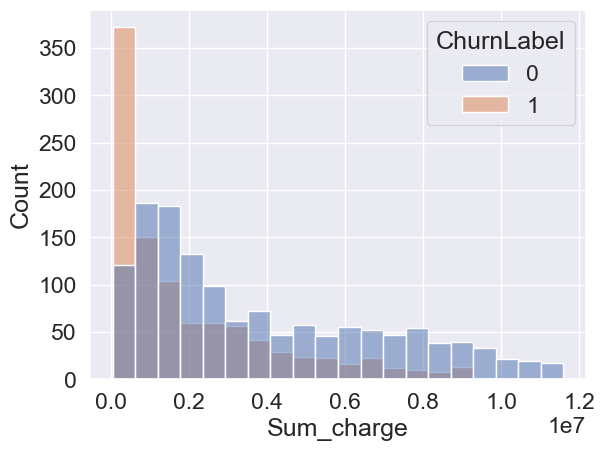

Monthly_charge


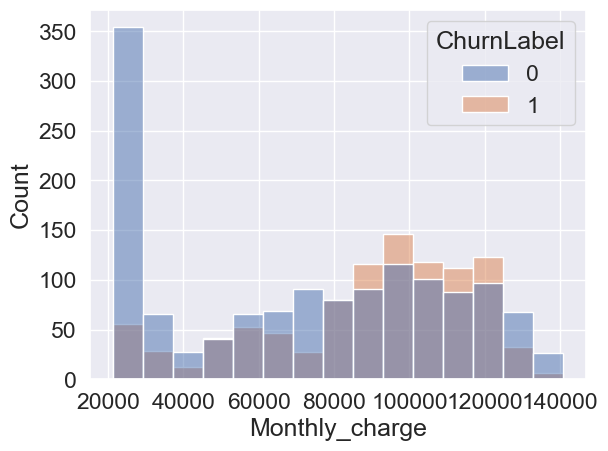

In [30]:
show_EDA_cont(df_churn_n_numeric)

# Churn No & Monthly_charge >= 24%

In [14]:
high_avg_of_monthly_charge(df_raw_use)

94826.0

In [16]:
# Monthly_charge>= high_avg  & churnLabel =  No
df_Mcharge_n = df_raw_use[(df_raw_use['Monthly_charge'] >= high_avg_of_monthly_charge(df_raw_use))]
df_Mcharge_n

Gender  Age AgeGroup Married Dependents  noDependents Referrals  \
2        남성   50      50대      No         No             0        No   
3        남성   78      70대     Yes         No             0       Yes   
6        여성   67      60대     Yes         No             0       Yes   
7        남성   52      50대     Yes         No             0       Yes   
9        여성   43      40대     Yes        Yes             1       Yes   
...     ...  ...      ...     ...        ...           ...       ...   
6846     여성   77      70대     Yes         No             0       Yes   
6847     남성   31      30대      No        Yes             1        No   
6850     남성   72      70대     Yes        Yes             1       Yes   
6851     여성   20      20대      No         No             0        No   
6855     남성   40      40대     Yes         No             0       Yes   

      noReferrals PaperlessBilling PaymentMethod  ... ChurnScore CustomerLTV  \
2               0              Yes          계좌이체  ...         71        4479   
3               1              Yes          계좌이체  ...         99        3714   
6               1              Yes          계좌이체  ...         26        5011   
7               8              Yes          신용카드  ...         49        4604   
9               3              Yes          신용카드  ...         25        5509   
...           ...              ...           ...  ...        ...         ...   
6846            1              Yes          계좌이체  ...         73        6355   
6847            0              Yes          신용카드  ...         52        4590   
6850            1              Yes          계좌이체  ...         68        3384   
6851            0              Yes          신용카드  ...         38        5545   
6855            1              Yes          계좌이체  ...         68        5248   

     SatisScore TotalExtraDataCharge  AvgRoamCharge TotalRoamCharge  \
2             1                    0          38080          152100   
3             1                    0          31410          408720   
6             3                    0          11300          799140   
7             4                22600          14690          922650   
9             3                    0          32210         2090390   
...         ...                  ...            ...             ...   
6846          3                    0          53790         2853140   
6847          5                    0          25310         1620650   
6850          3                90400          47800         2245990   
6851          3                    0          41250          288600   
6855          1                    0          18310          402730   

      Tenure_month  Sum_charge  Monthly_charge  ReasonCategory  
2                5      490900    98180.000000           Price  
3               14     1578400   112742.857143              PS  
6               83    10744500   129451.807229             NaN  
7               75     7455600    99408.000000             NaN  
9               77     8186200   106314.285714             NaN  
...            ...         ...             ...             ...  
6846            65     7092600   109116.923077             NaN  
6847            76     8799400   115781.578947             NaN  
6850            59     5890100    99832.203390             NaN  
6851            19     2012200   105905.263158             NaN  
6855            23     2343500   101891.304348              PS  

[2575 rows x 26 columns]

In [17]:
df_Mcharge_n_char = df_Mcharge_n.select_dtypes(include = 'object') #범주형
df_Mcharge_n['ChurnLabel'] = df_Mcharge_n['ChurnLabel'].replace({'Yes': 1, 'No': 0})
df_Mcharge_n_numeric = df_Mcharge_n.select_dtypes(exclude = 'object') #연속형

C:\Users\Kwangyoung Han\AppData\Local\Temp\ipykernel_13612\3282567552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mcharge_n['ChurnLabel'] = df_Mcharge_n['ChurnLabel'].replace({'Yes': 1, 'No': 0})


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  

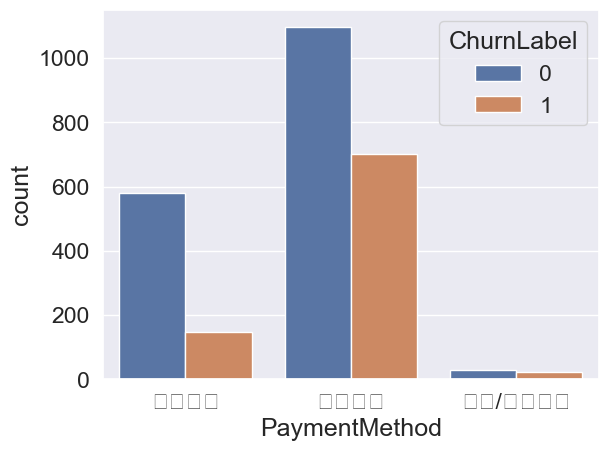

In [34]:
sns.countplot(x = 'PaymentMethod', order = ['신용카드', '계좌이체', '이체/메일확인'], hue = 'ChurnLabel', data = df_Mcharge_n)
sns.set(font_scale = 1.5)
plt.show()

## 범주형

Gender


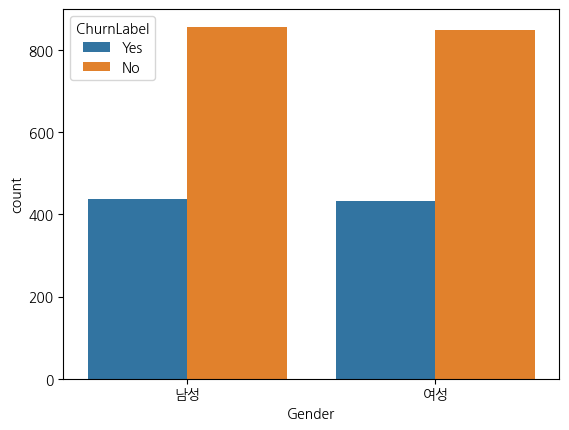

AgeGroup


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


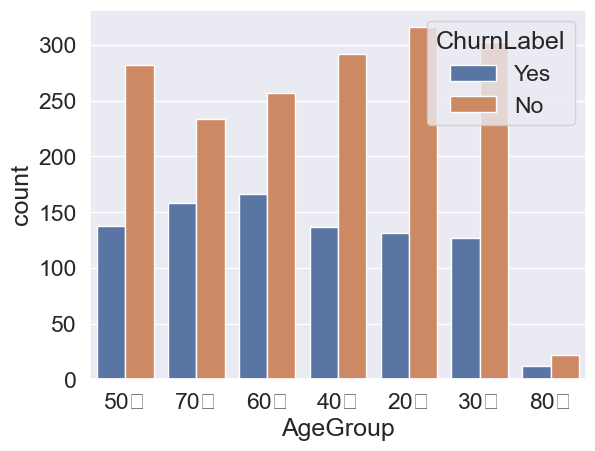

Married


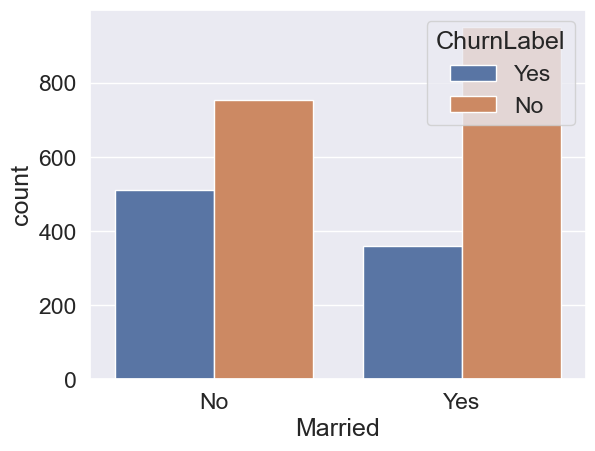

Dependents


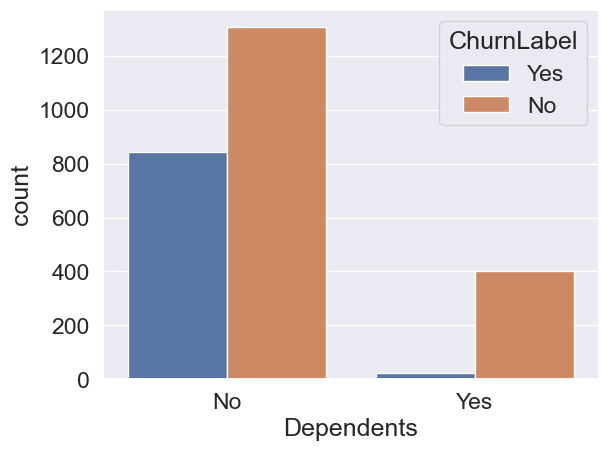

Referrals


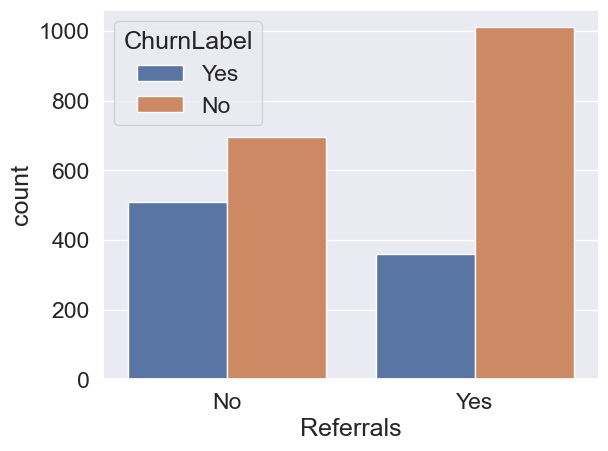

PaperlessBilling


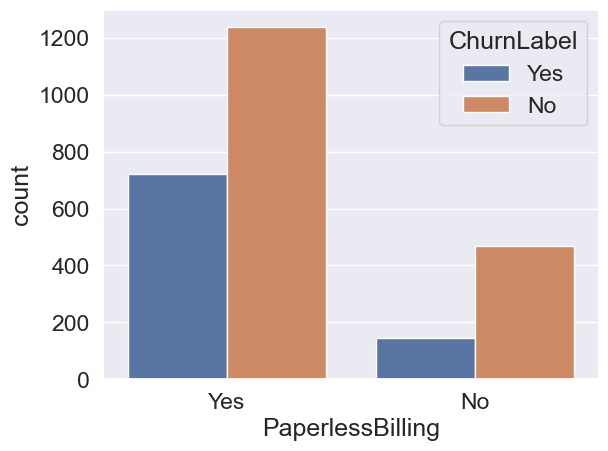

PaymentMethod


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig

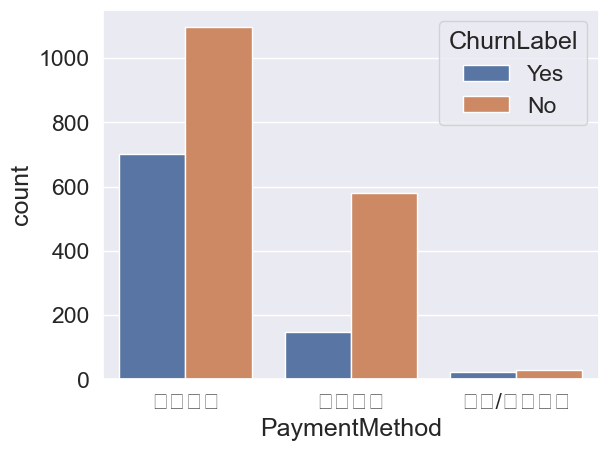

OnlineSecurity


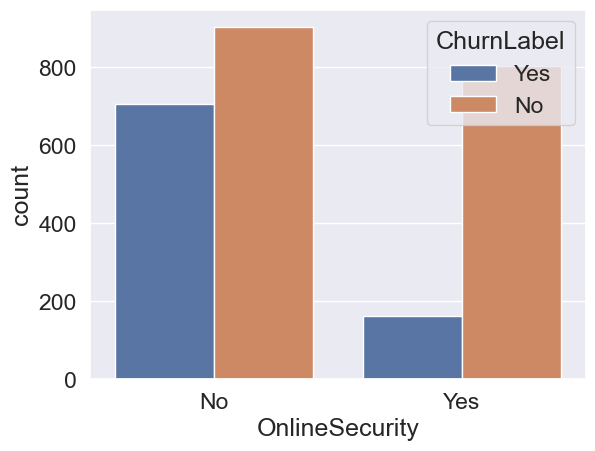

OnlineBackup


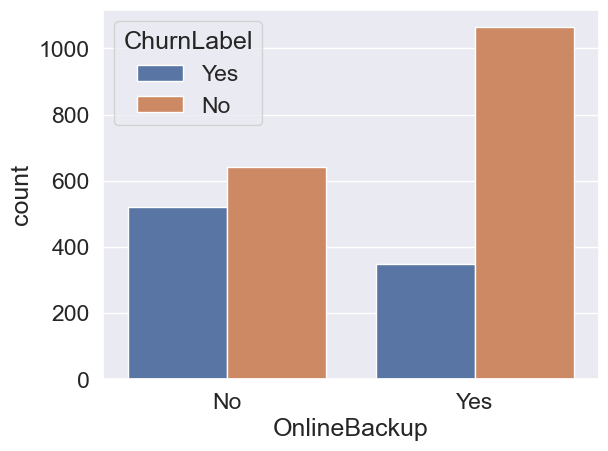

TechSupport


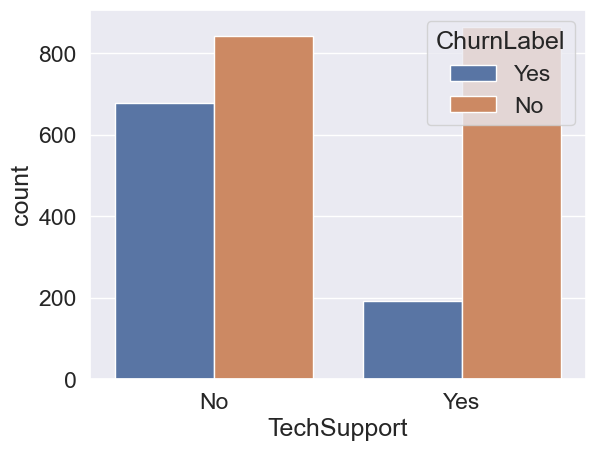

UnlimitedData


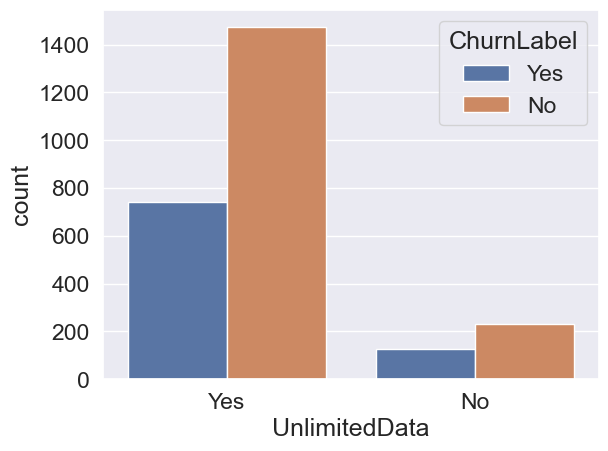

ChurnLabel


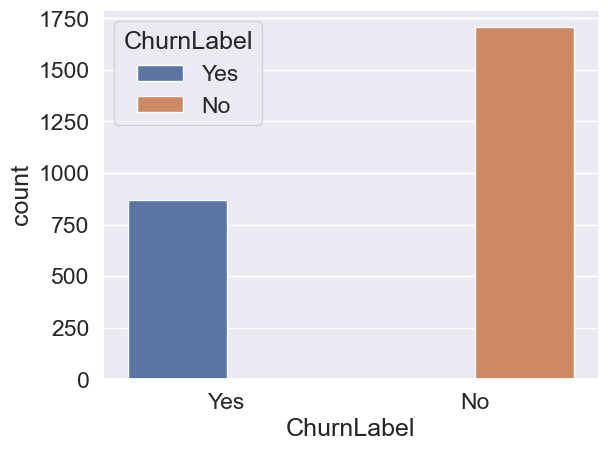

ReasonCategory


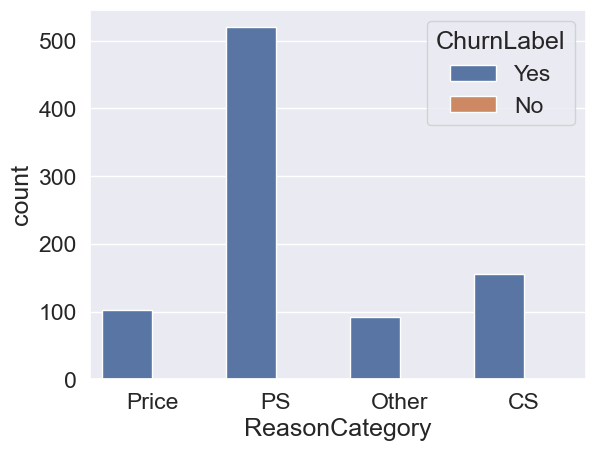

In [18]:
show_EDA_bj(df_Mcharge_n_char)

## 연속형

Age


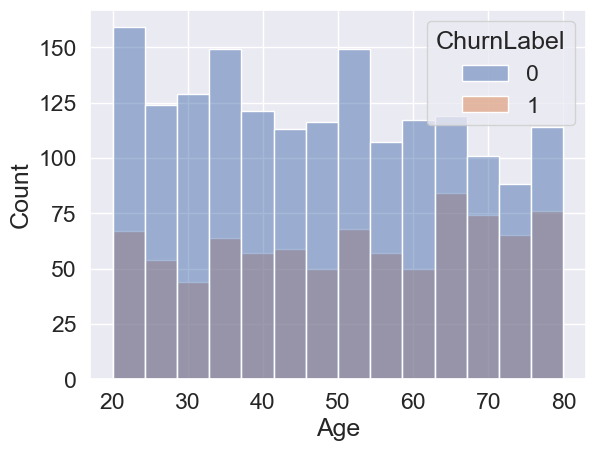

noDependents


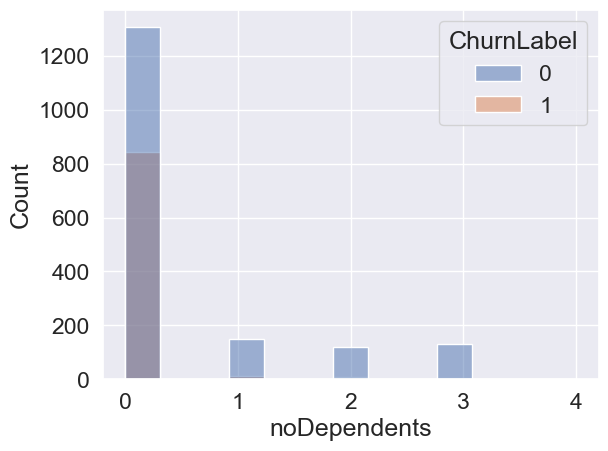

noReferrals


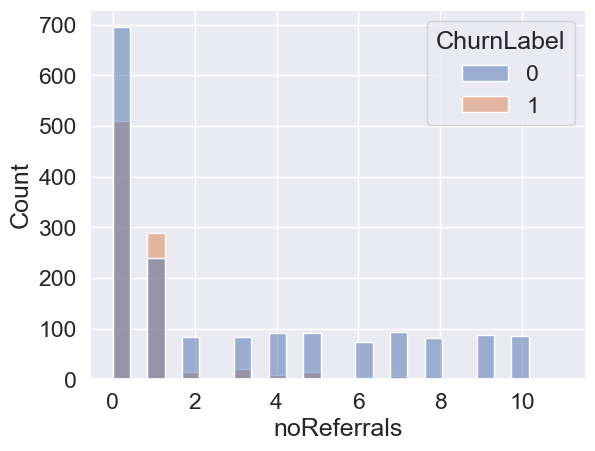

AvgDownloadGB


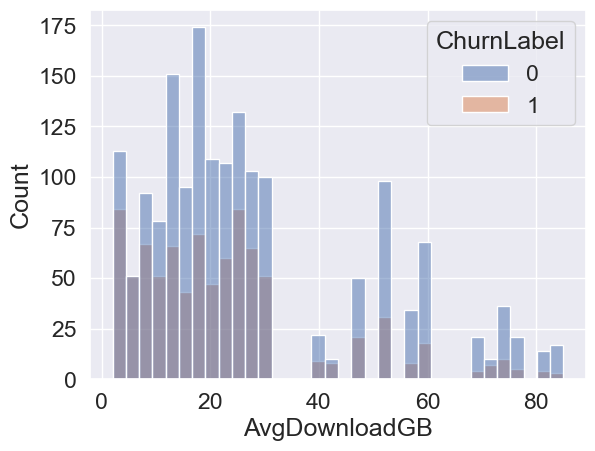

ChurnLabel


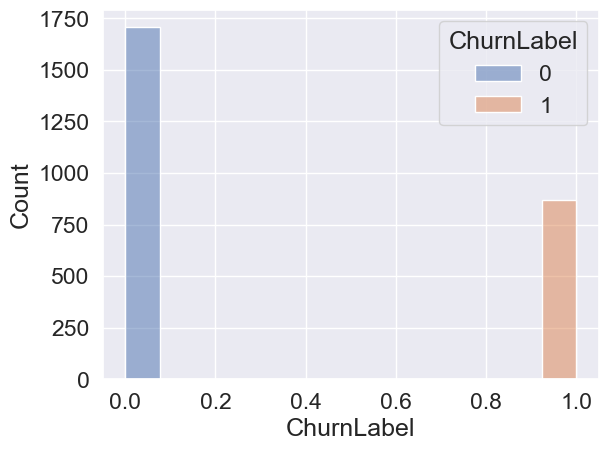

ChurnScore


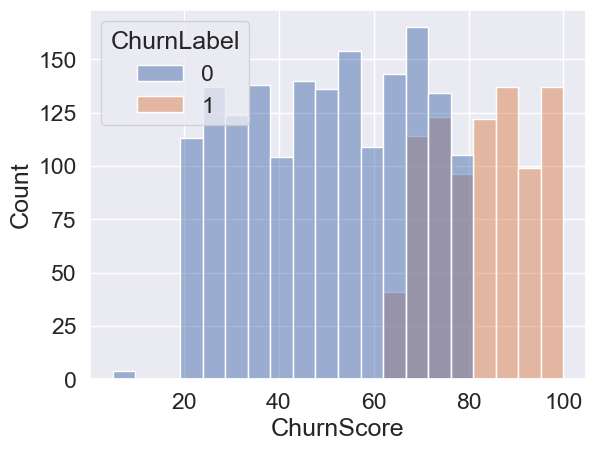

CustomerLTV


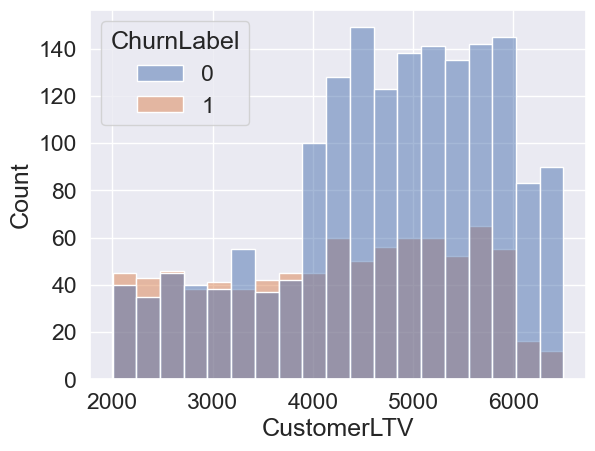

SatisScore


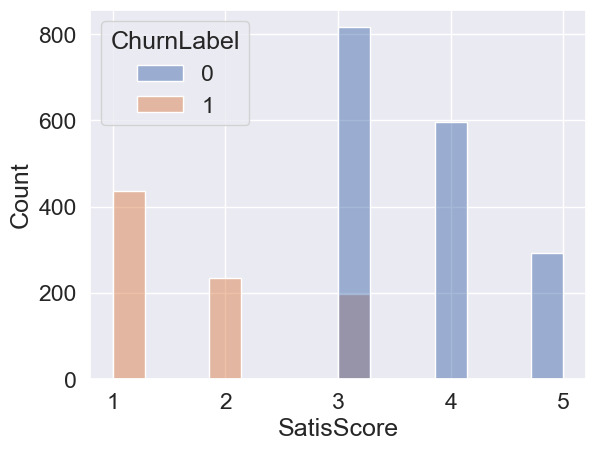

TotalExtraDataCharge


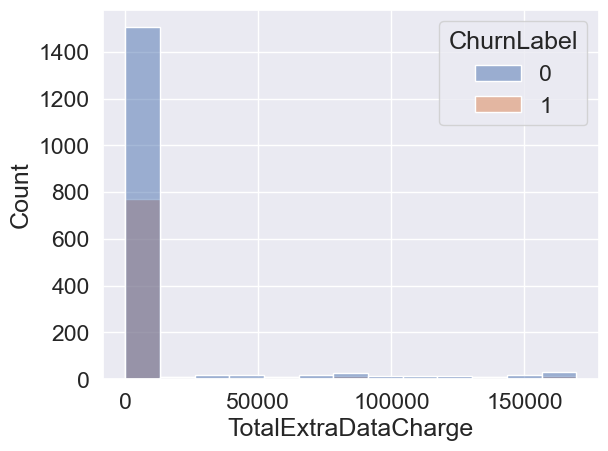

AvgRoamCharge


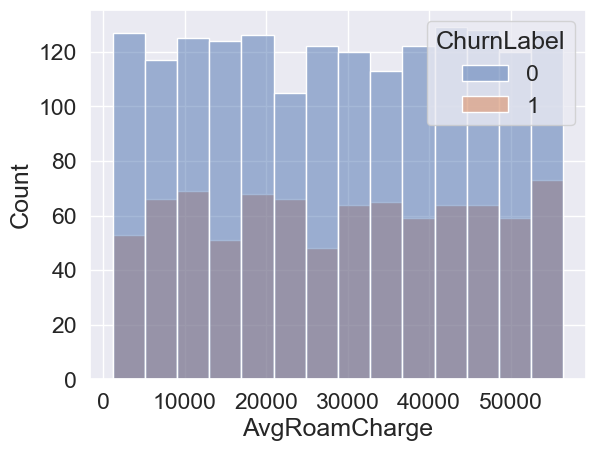

TotalRoamCharge


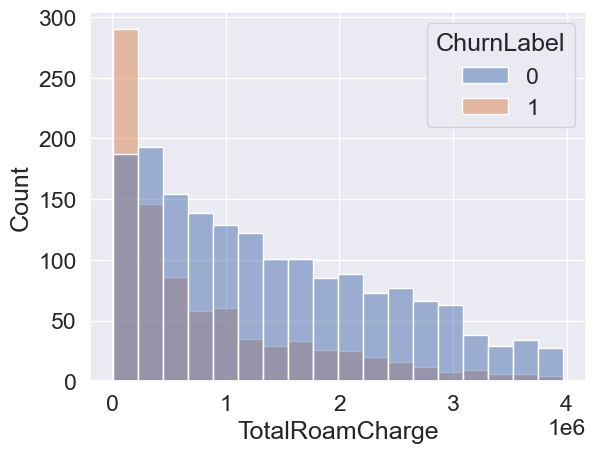

Tenure_month


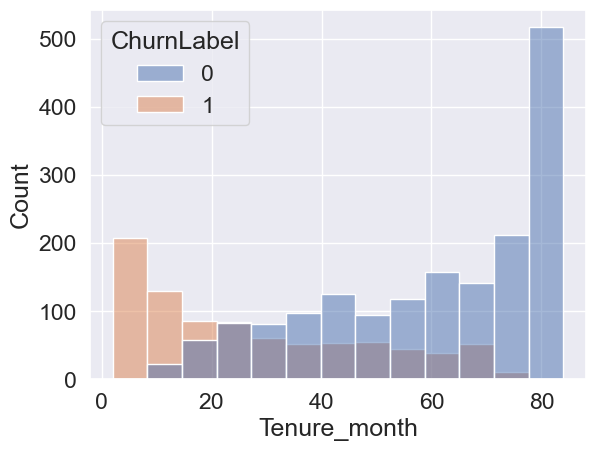

Sum_charge


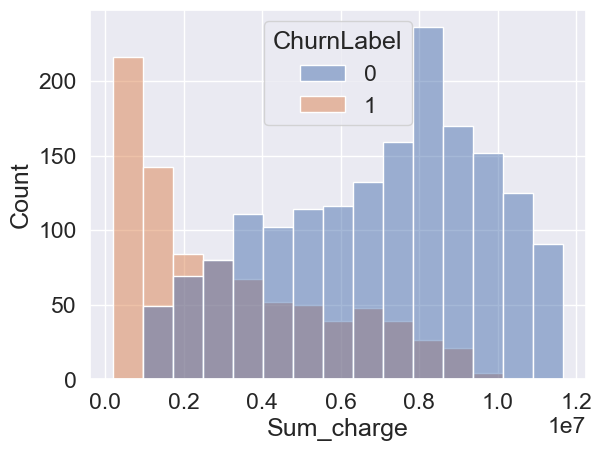

Monthly_charge


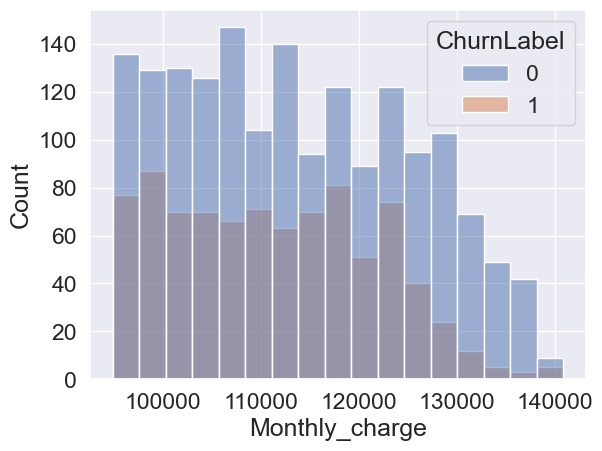

In [36]:
show_EDA_cont(df_Mcharge_n_numeric)

# SatisScore 3 & ChurnLabel = No

In [37]:
df_Satis_n = df_raw_use[(df_raw_use['SatisScore'] == 3)]

In [38]:
df_Satis_n_char = df_Satis_n.select_dtypes(include = 'object') #범주형
df_Satis_n['ChurnLabel'] = df_Satis_n['ChurnLabel'].replace({'Yes': 1, 'No': 0})
df_Satis_n_numeric = df_Satis_n.select_dtypes(exclude = 'object') #연속형

C:\Users\Kwangyoung Han\AppData\Local\Temp\ipykernel_22140\1322296240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Satis_n['ChurnLabel'] = df_Satis_n['ChurnLabel'].replace({'Yes': 1, 'No': 0})


 ## 범주형

C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Gender


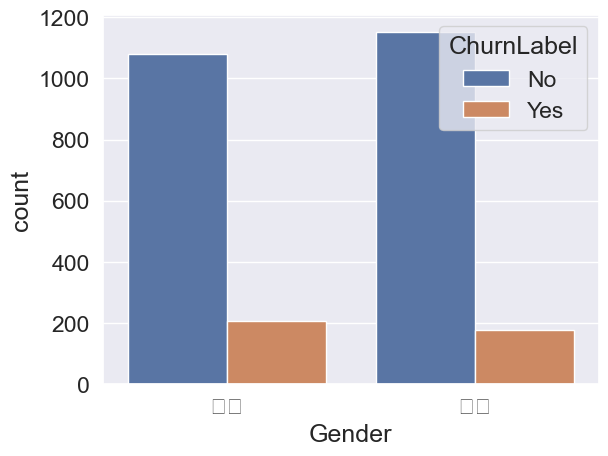

AgeGroup


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


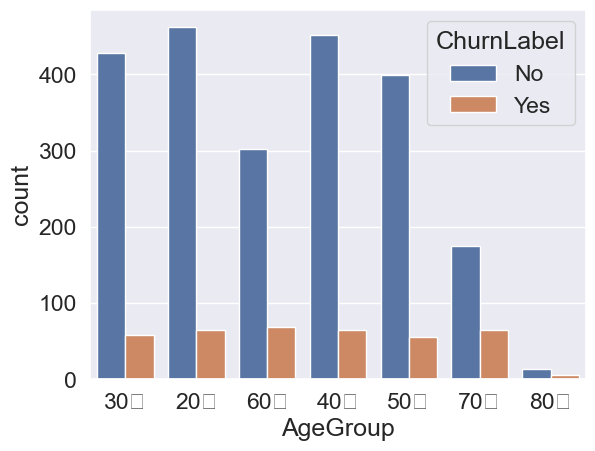

Married


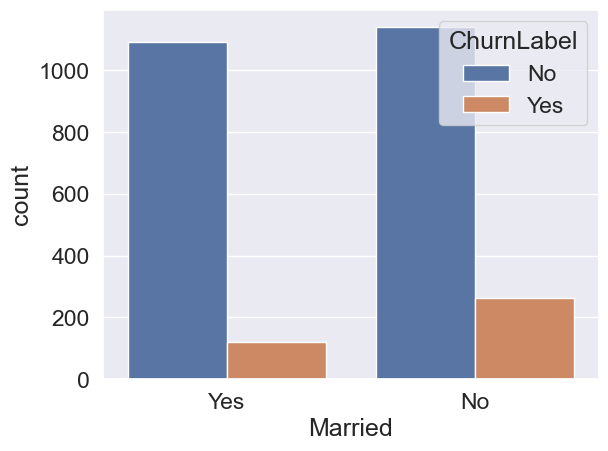

Dependents


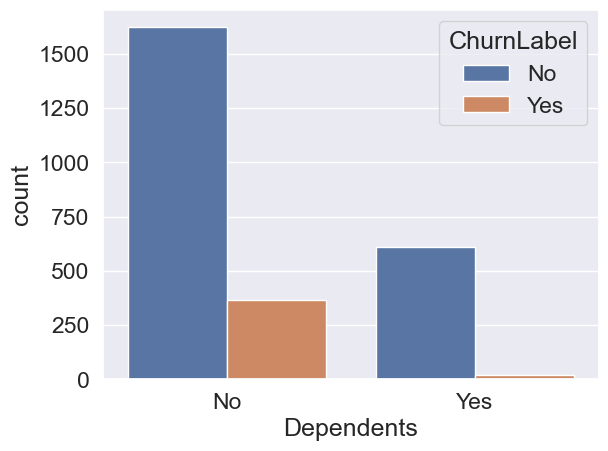

Referrals


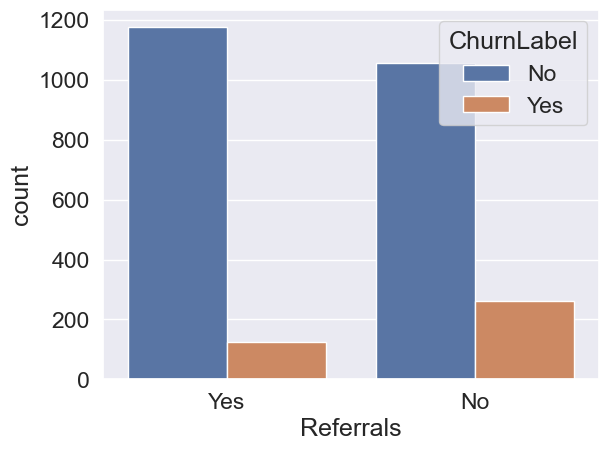

PaperlessBilling


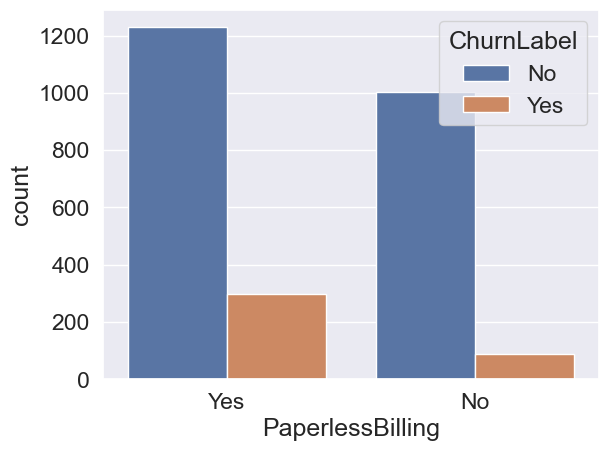

PaymentMethod


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  

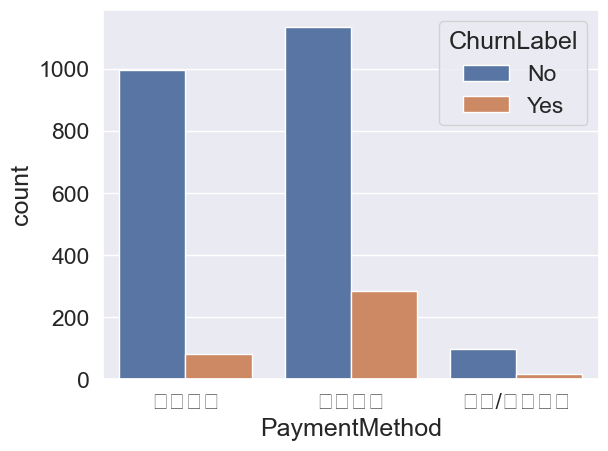

OnlineSecurity


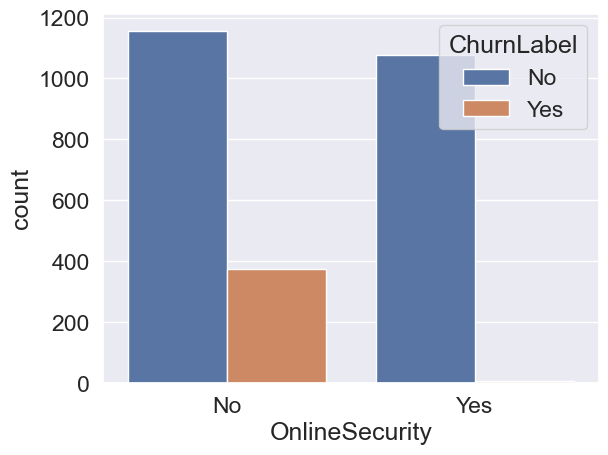

OnlineBackup


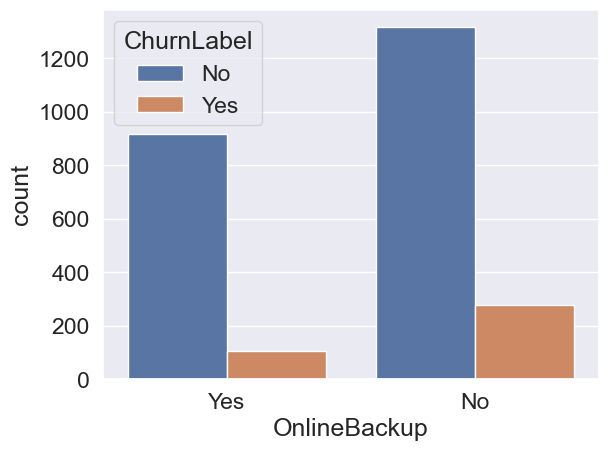

TechSupport


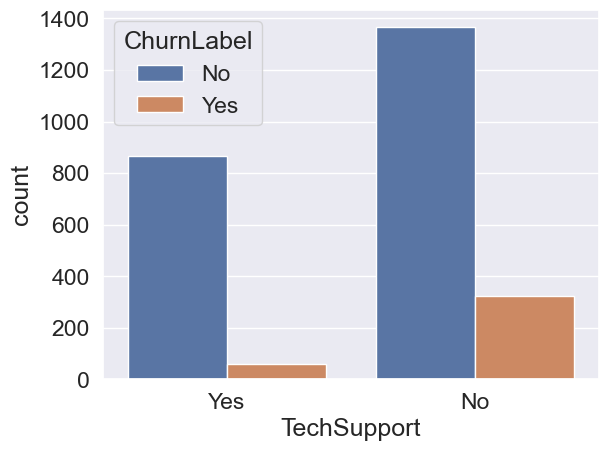

UnlimitedData


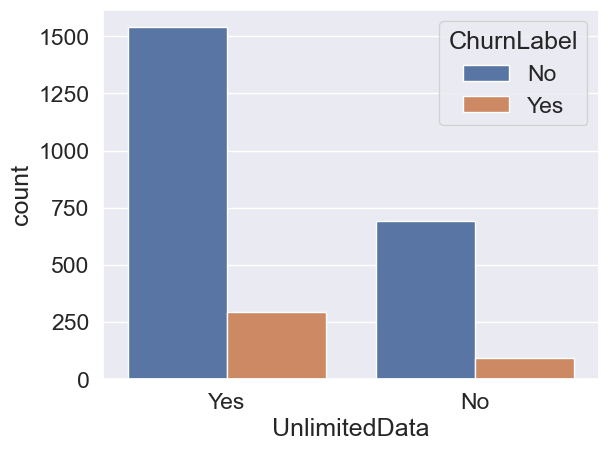

ChurnLabel


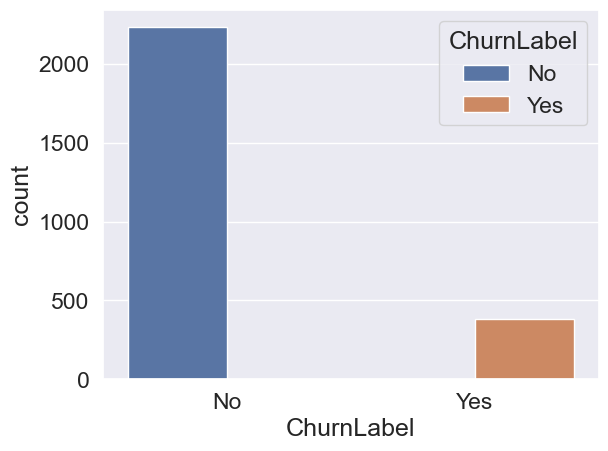

In [39]:
show_EDA_bj(df_Satis_n_char)

## 연속형

Age


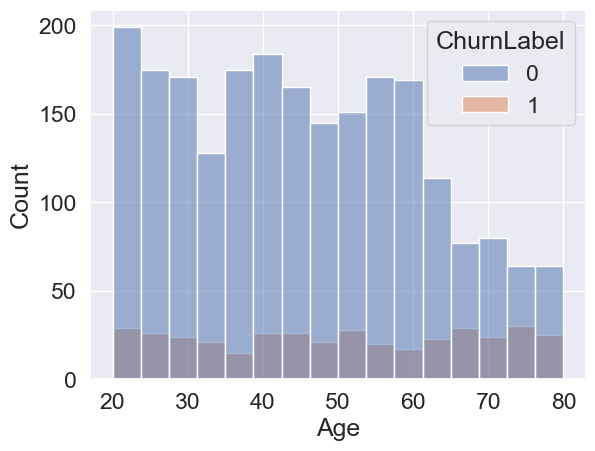

noDependents


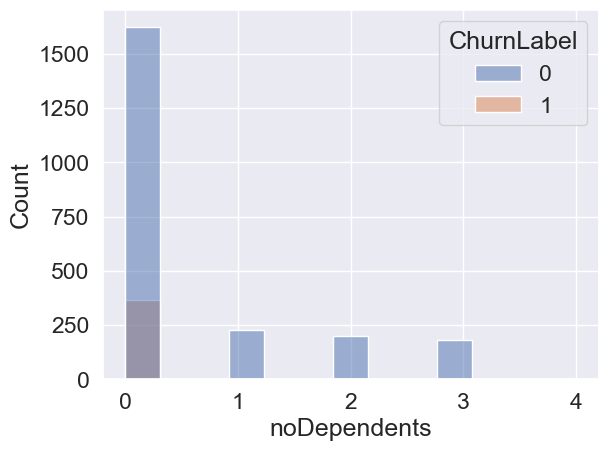

noReferrals


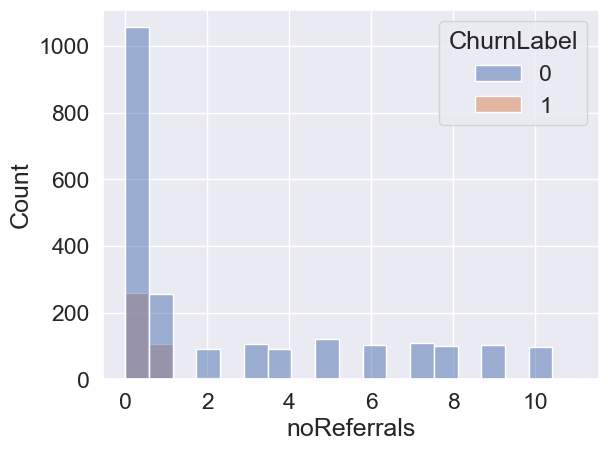

AvgDownloadGB


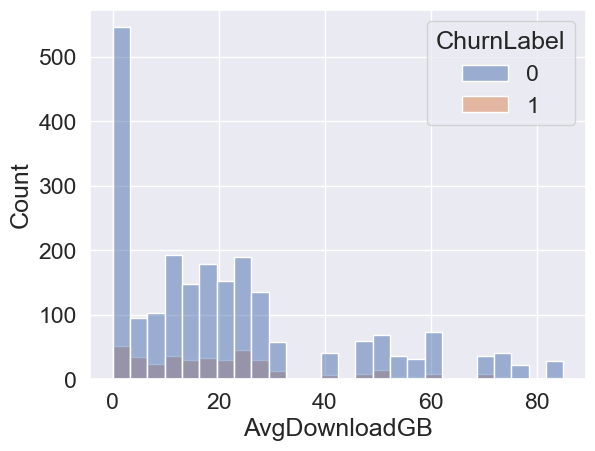

ChurnLabel


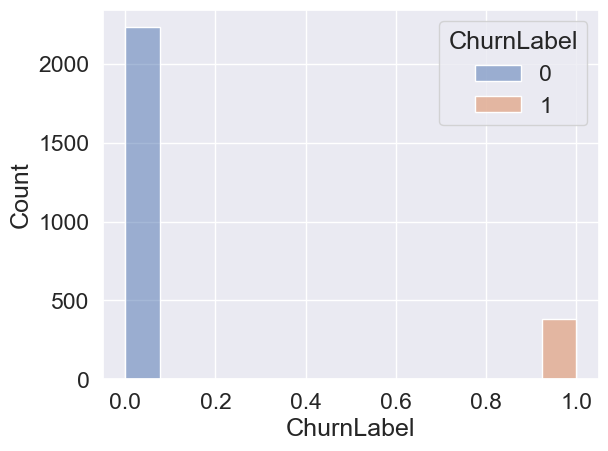

ChurnScore


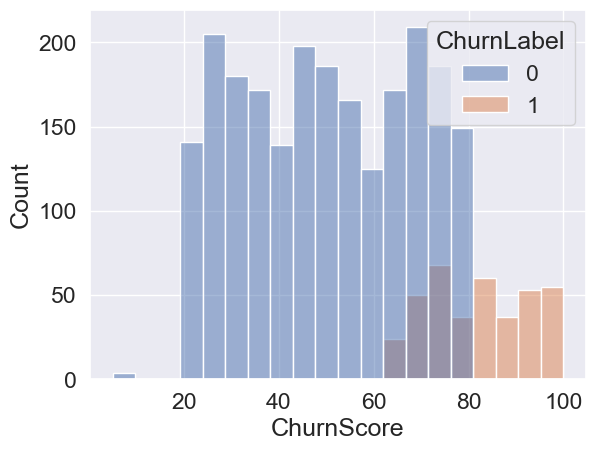

CustomerLTV


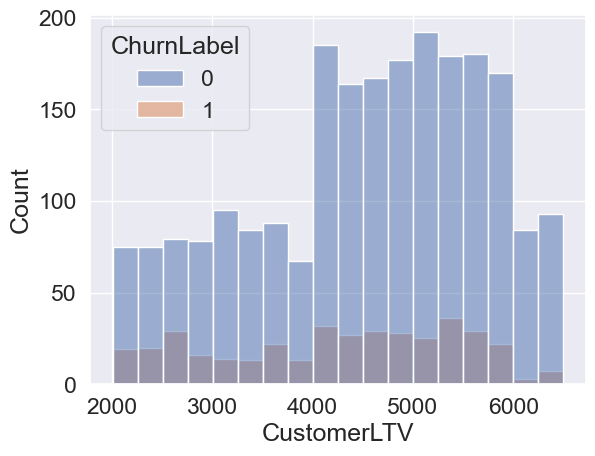

SatisScore


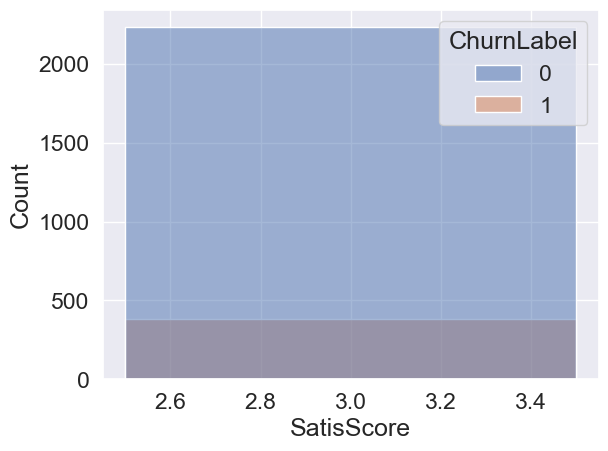

TotalExtraDataCharge


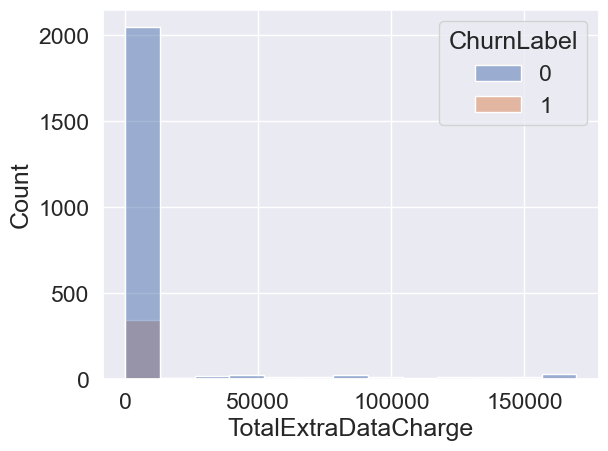

AvgRoamCharge


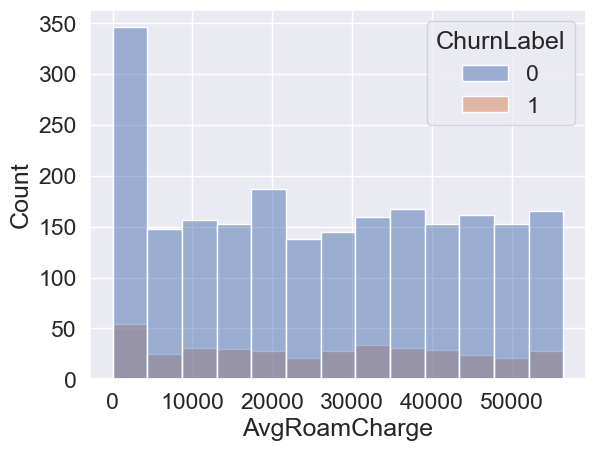

TotalRoamCharge


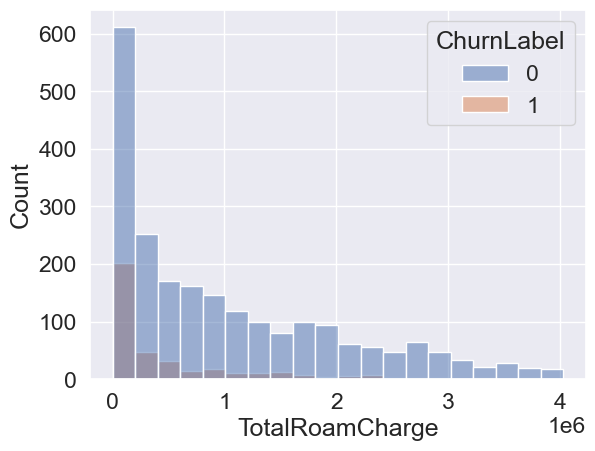

Tenure_month


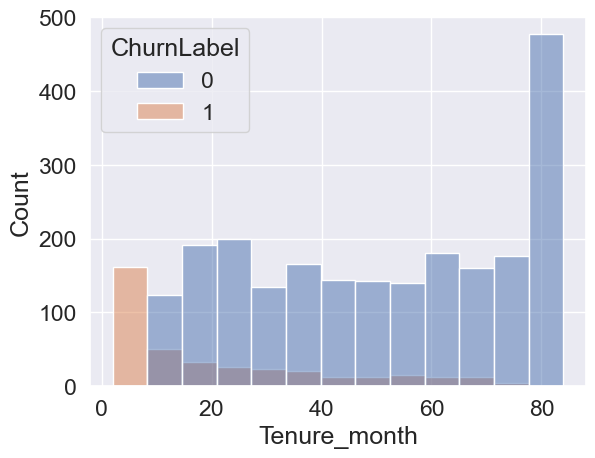

Sum_charge


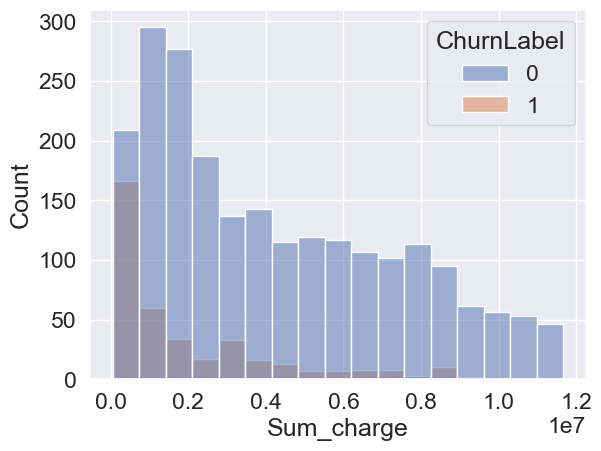

Monthly_charge


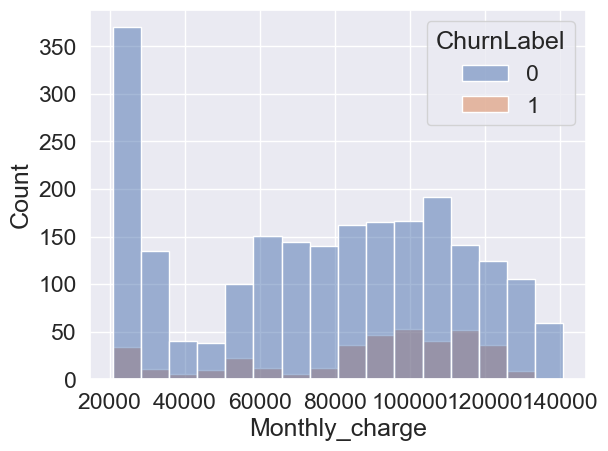

In [40]:
show_EDA_cont(df_Satis_n_numeric)

# 경쟁사 이유로 나가는 사람& Churn Yes

In [14]:
df_Cptr_n = df_raw_use_churn[(df_raw_use_churn['ChurnLabel'] == 'Yes') \
                      & (df_raw_use_churn['ChurnCategory'] == 'Competitor')]

In [15]:
df_Cptr_n

Gender  Age AgeGroup Married Dependents  noDependents Referrals  \
19       남성   67      60대      No         No             0        No   
39       남성   69      60대      No         No             0        No   
52       남성   51      50대      No         No             0        No   
62       남성   59      50대      No         No             0        No   
65       남성   61      60대     Yes         No             0       Yes   
...     ...  ...      ...     ...        ...           ...       ...   
6826     여성   55      50대      No         No             0        No   
6828     남성   65      60대      No         No             0        No   
6829     남성   44      40대     Yes         No             0       Yes   
6852     여성   53      50대      No         No             0        No   
6853     여성   36      30대      No         No             0        No   

      noReferrals PaperlessBilling PaymentMethod  ... ChurnCategory  \
19              0              Yes          계좌이체  ...    Competitor   
39              0              Yes          계좌이체  ...    Competitor   
52              0              Yes          신용카드  ...    Competitor   
62              0              Yes          계좌이체  ...    Competitor   
65              1               No          계좌이체  ...    Competitor   
...           ...              ...           ...  ...           ...   
6826            0              Yes          계좌이체  ...    Competitor   
6828            0              Yes          계좌이체  ...    Competitor   
6829            1              Yes          계좌이체  ...    Competitor   
6852            0              Yes          신용카드  ...    Competitor   
6853            0               No          계좌이체  ...    Competitor   

     CustomerLTV SatisScore TotalExtraDataCharge  AvgRoamCharge  \
19          5437          3                    0              0   
39          3475          2                    0          49720   
52          2832          1                    0          42600   
62          4214          1                    0          45990   
65          6452          2                    0          44750   
...          ...        ...                  ...            ...   
6826        5861          1                    0          53790   
6828        4616          1                    0          32880   
6829        2405          1                45200          40230   
6852        5773          1                    0          47570   
6853        5822          1                    0           2260   

     TotalRoamCharge  Tenure_month Sum_charge  Monthly_charge  ReasonCategory  
19                 0             2      55600    27800.000000              PS  
39             99440             3     174500    58166.666667              PS  
52           1703590            41    5015100   122319.512195              PS  
62             45990             2     227700   113850.000000              PS  
65           2189940            50    4891300    97826.000000              PS  
...              ...           ...        ...             ...             ...  
6826          161480             4     427600   106900.000000              PS  
6828          493470            16    1414200    88387.500000              CS  
6829         1529120            39    3672000    94153.846154              PS  
6852           47570             2     155100    77550.000000              PS  
6853            9040             5     118300    23660.000000              PS  

[722 rows x 27 columns]

In [21]:
df_Cptr_n_char = df_Cptr_n.select_dtypes(include = 'object') #범주형
df_Cptr_n_numeric = df_Cptr_n.select_dtypes(exclude = 'object') #연속형

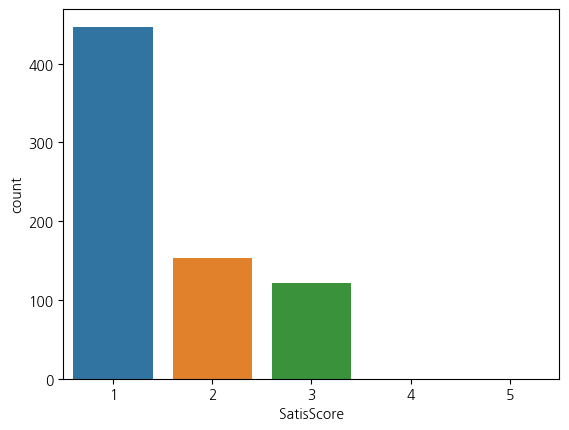

In [17]:
show_EDA_indi(df_Cptr_n, 'SatisScore')

## 범주형

Gender


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


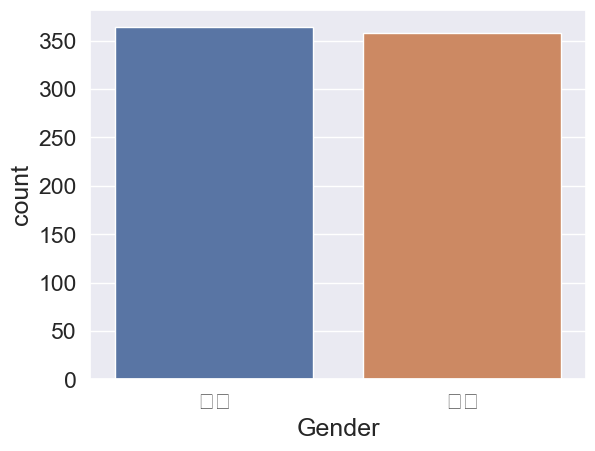

AgeGroup


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


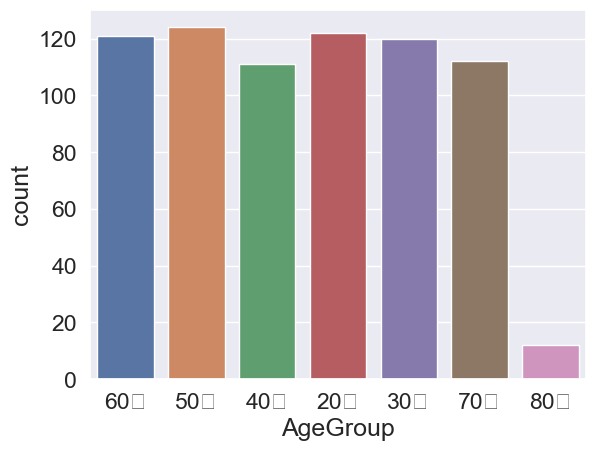

Married


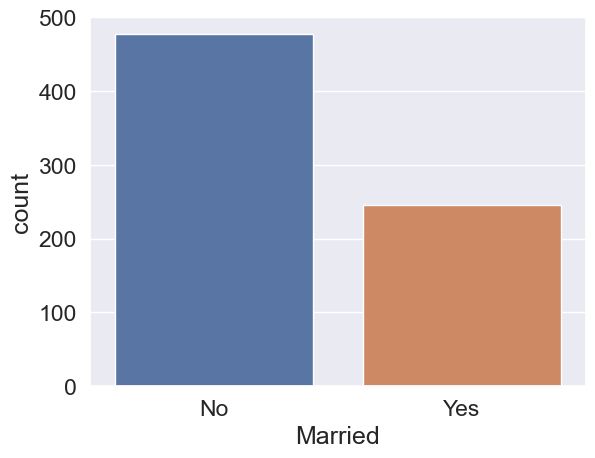

Dependents


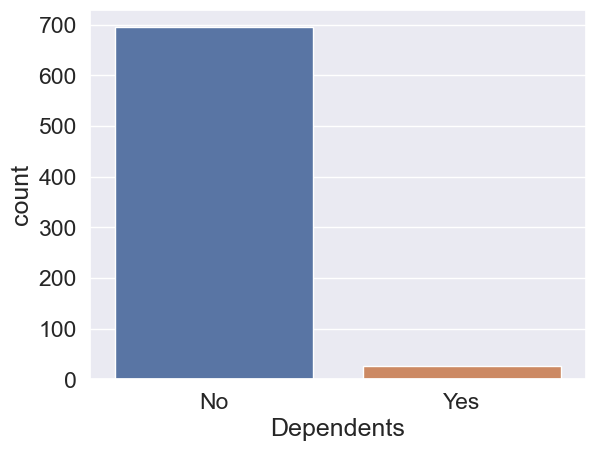

Referrals


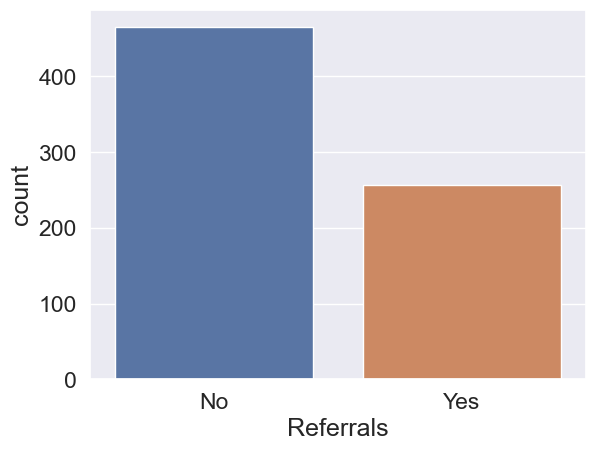

PaperlessBilling


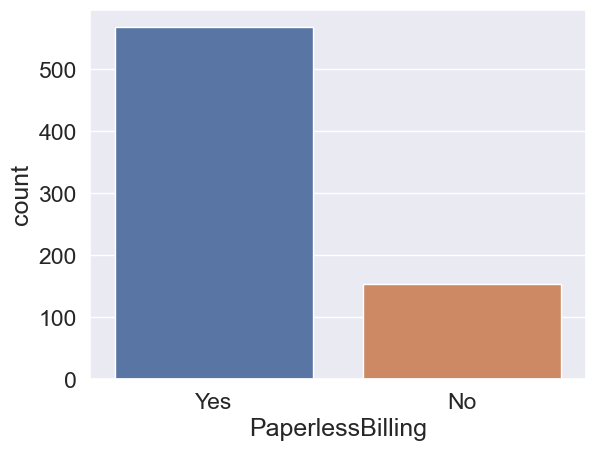

PaymentMethod


C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kwangyoung Han\anaconda_true\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig

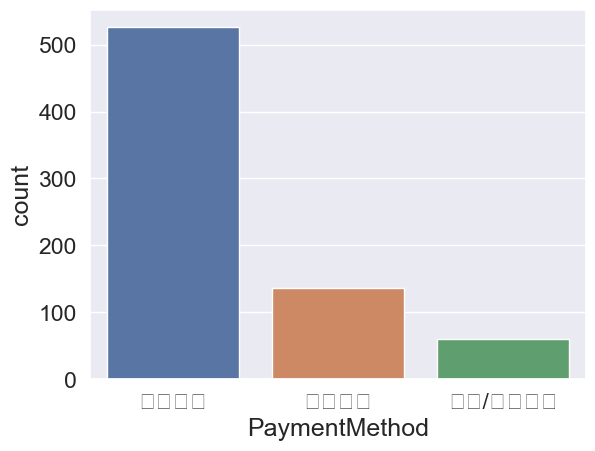

OnlineSecurity


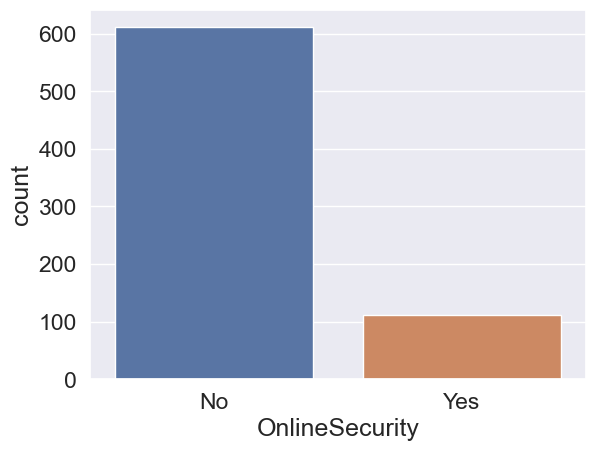

OnlineBackup


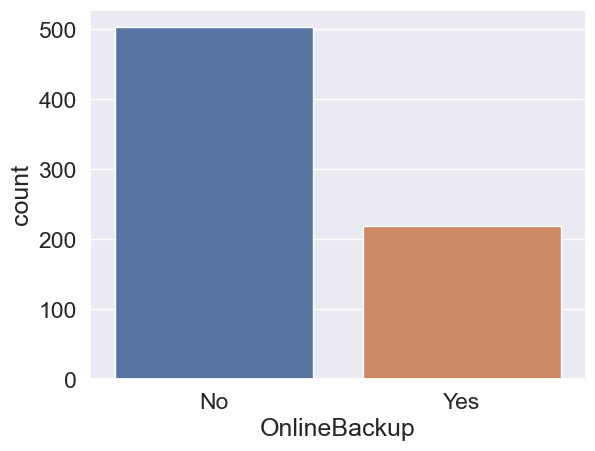

TechSupport


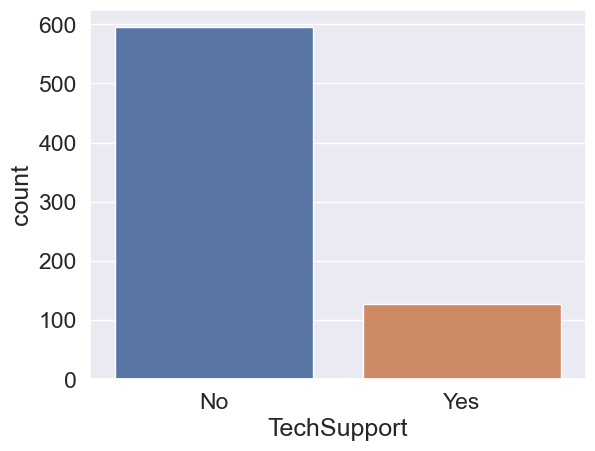

UnlimitedData


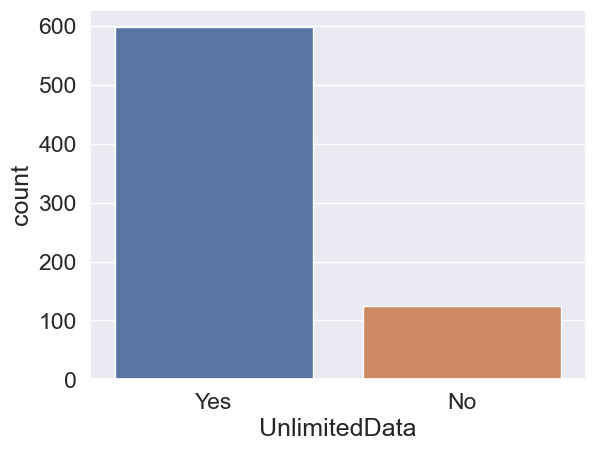

ChurnLabel


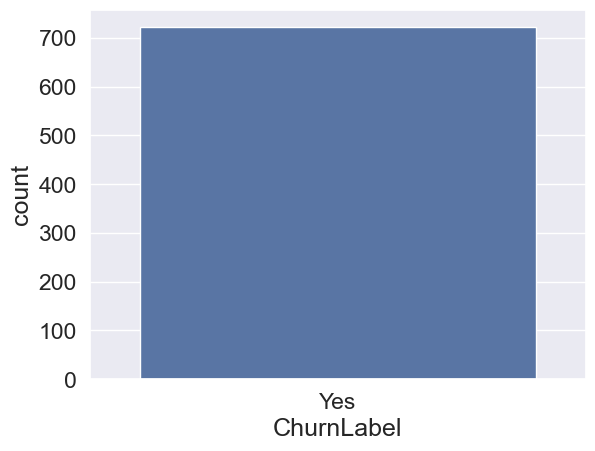

ChurnCategory


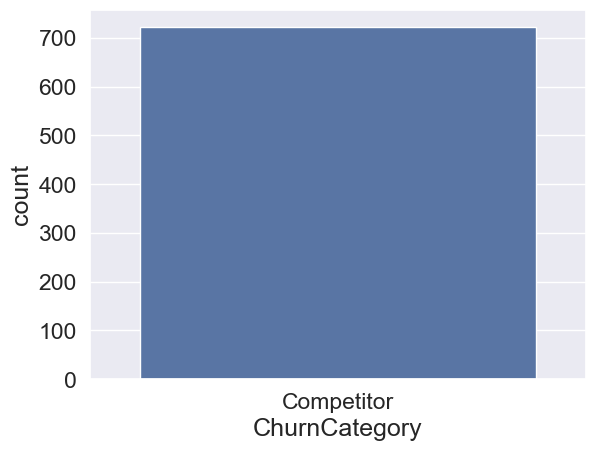

ReasonCategory


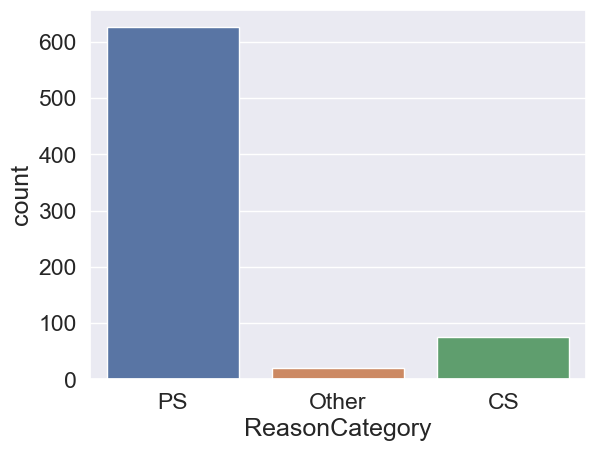

In [22]:
show_EDA_gn_bj(df_Cptr_n_char)

## 연속형

Age


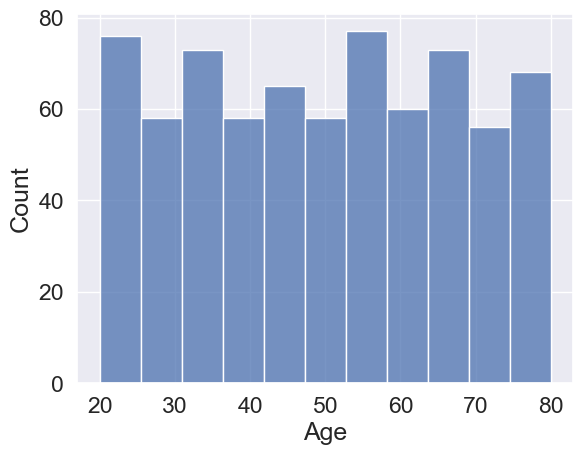

noDependents


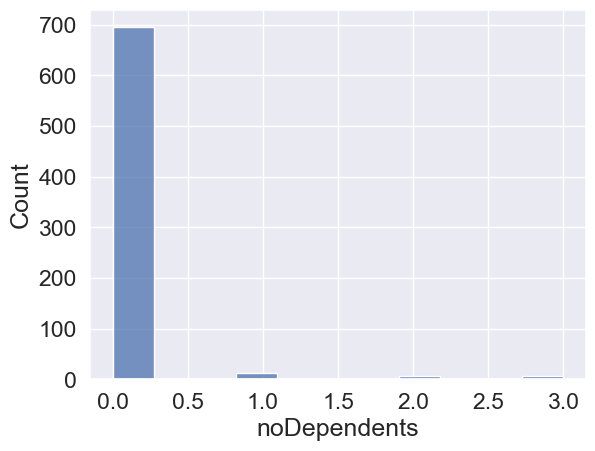

noReferrals


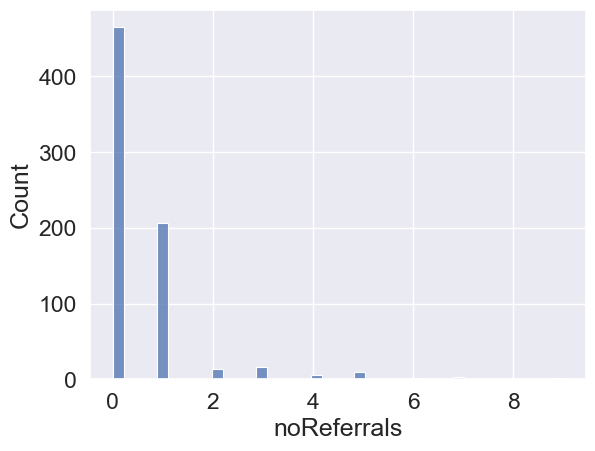

AvgDownloadGB


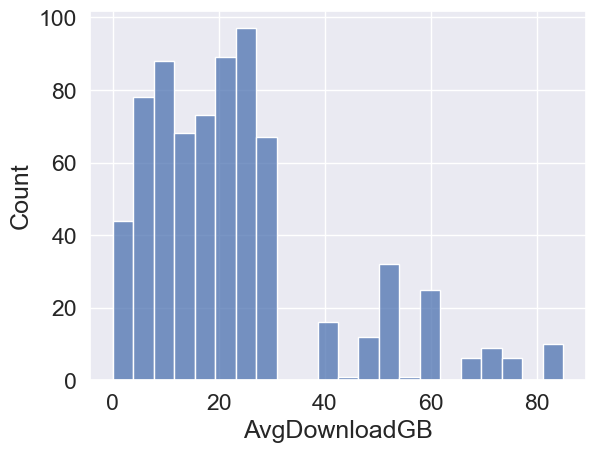

ChurnScore


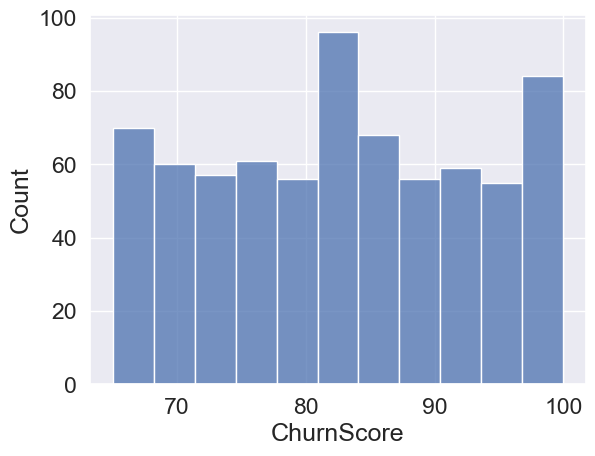

CustomerLTV


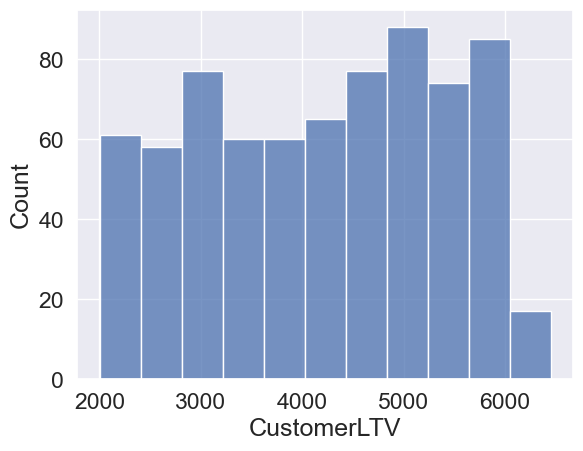

SatisScore


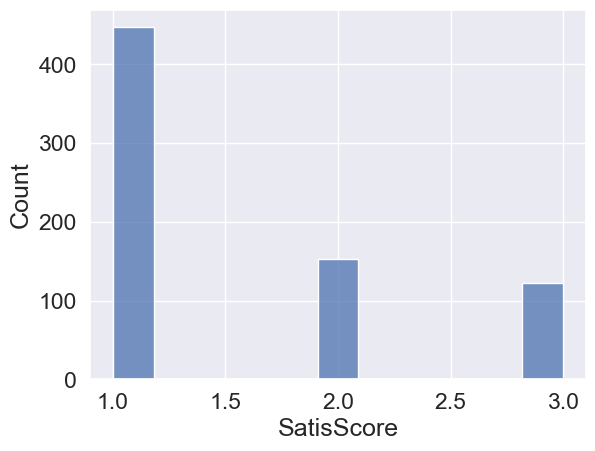

TotalExtraDataCharge


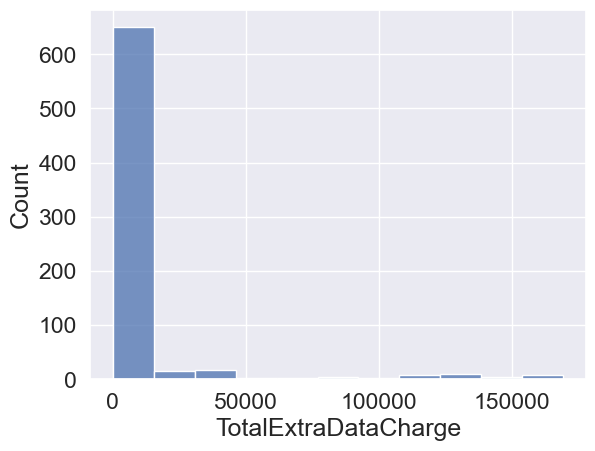

AvgRoamCharge


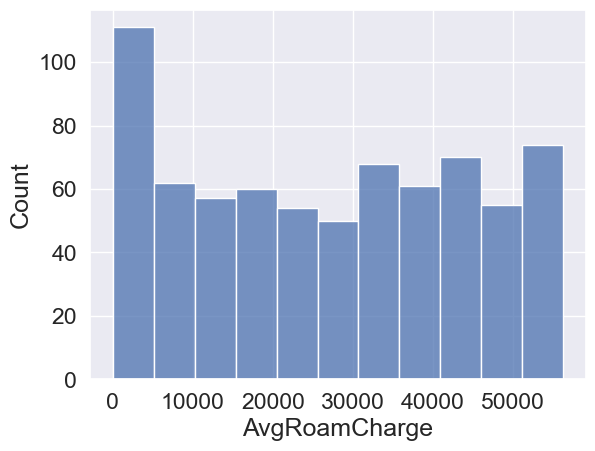

TotalRoamCharge


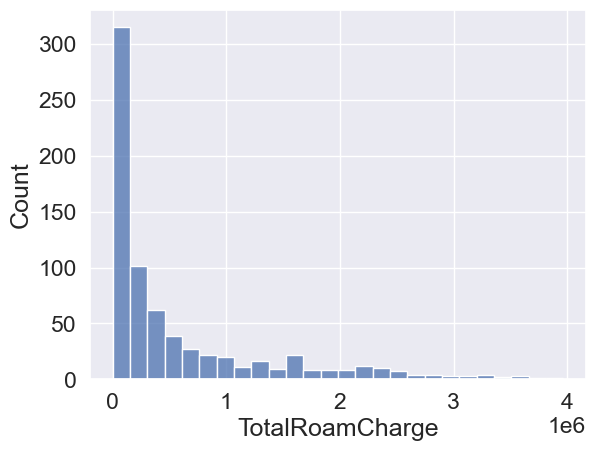

Tenure_month


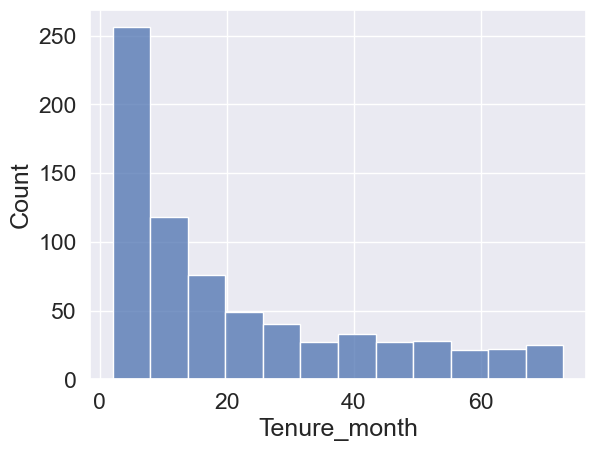

Sum_charge


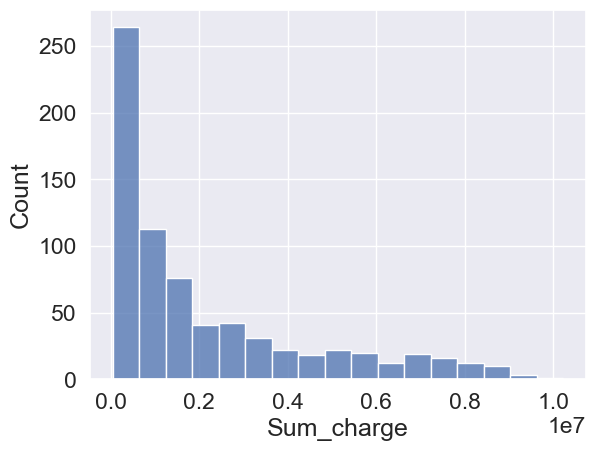

Monthly_charge


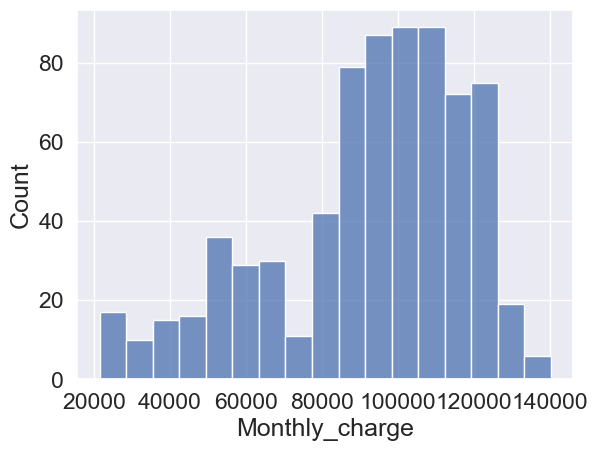

In [23]:
show_EDA_gn_cont(df_Cptr_n_numeric)